## Extracción de la información

In [519]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import os
import warnings
import seaborn as sns
import locale
import math

# Suprimir todos los FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Suprimir warnings específicos de yfinance
warnings.filterwarnings('ignore', message='.*auto_adjust.*')

pd.options.mode.chained_assignment = None

# Descargar datos de BBVA

bbva = yf.download('BBVA.MC', start='2010-01-01', end='2025-08-31')
santander = yf.download('SAN.MC', start='2010-01-01', end='2025-08-31')
sabadell = yf.download('SAB.MC', start='2010-01-01', end='2025-08-31')
bankinter = yf.download('BKT.MC', start='2010-01-01', end='2025-08-31')
caixabank = yf.download('CABK.MC', start='2010-01-01', end='2025-08-31')
unicaja = yf.download('UNI.MC', start='2010-01-01', end='2025-08-31')


print(bbva.describe(),"\n") 
print(santander.describe(),"\n")
print(bankinter.describe(), "\n")
print(sabadell.describe(),"\n")
print(caixabank.describe(),"\n")
print(unicaja.describe(),"\n")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price         Close         High          Low         Open        Volume
Ticker      BBVA.MC      BBVA.MC      BBVA.MC      BBVA.MC       BBVA.MC
count   4007.000000  4007.000000  4007.000000  4007.000000  4.007000e+03
mean       4.721315     4.778106     4.657952     4.719907  3.935376e+07
std        2.266704     2.282805     2.242114     2.260112  4.295000e+07
min        1.646662     1.696977     1.622267     1.639038  0.000000e+00
25%        3.470244     3.518140     3.423629     3.475497  1.627335e+07
50%        4.076171     4.131225     4.031005     4.080707  2.746292e+07
75%        4.932290     4.982469     4.874550     4.929974  4.618471e+07
max       16.480000    16.700001    16.445000    16.629999  6.009019e+08 

Price         Close         High          Low         Open        Volume
Ticker       SAN.MC       SAN.MC       SAN.MC       SAN.MC        SAN.MC
count   4007.000000  4007.000000  4007.000000  4007.000000  4.007000e+03
mean       3.405571     3.448572     3.360051    

## Analisis previo

In [520]:
# Mostramos las primeras 10 líneas

print(bbva.head(10), "\n")
print(sabadell.head(10), "\n")
print(santander.head(10), "\n")
print(unicaja.head(10), "\n")
print(bankinter.head(10), "\n")
print(caixabank.head(10), "\n")

Price          Close      High       Low      Open    Volume
Ticker       BBVA.MC   BBVA.MC   BBVA.MC   BBVA.MC   BBVA.MC
Date                                                        
2010-01-04  5.410954  5.410954  5.306656  5.310828  91911560
2010-01-05  5.448501  5.471446  5.406782  5.410954  48280066
2010-01-06  5.469359  5.492304  5.425554  5.448499  12069848
2010-01-07  5.444328  5.473532  5.385922  5.469359  21497189
2010-01-08  5.486047  5.513164  5.435984  5.444328  44302415
2010-01-11  5.448501  5.536111  5.435985  5.486048  42657631
2010-01-12  5.446415  5.494392  5.419298  5.448501  31361471
2010-01-13  5.402609  5.463102  5.388007  5.446414  37275170
2010-01-14  5.410954  5.450587  5.362977  5.402610  25719625
2010-01-15  5.344203  5.477704  5.315000  5.410953  37230304 

Price          Close      High       Low      Open    Volume
Ticker        SAB.MC    SAB.MC    SAB.MC    SAB.MC    SAB.MC
Date                                                        
2010-01-04  1.328521  

Vemos que la información que nos muestran son los precios y no la rentabilidad que aportan las acciones de cada entidad

# Significado de los datos de cada columna:

* Date: Fecha de negociación.
* Open: Precio al que abre la acción ese día.
* High: Precio máximo alcanzado durante el día.
* Low: Precio mínimo del día.
* Close: Precio al cierre del mercado (dato por el que nos guiaremos para el estudio)
* Volume: Número de acciones negociadas ese día.

In [521]:
# Revisamos si tienes datos nulos
print(bbva.info(), "\n")
print(sabadell.info(), "\n")
print(santander.info(), "\n")
print(unicaja.info(), "\n")
print(bankinter.info(), "\n")
print(caixabank.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4007 entries, 2010-01-04 to 2025-08-29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BBVA.MC)   4007 non-null   float64
 1   (High, BBVA.MC)    4007 non-null   float64
 2   (Low, BBVA.MC)     4007 non-null   float64
 3   (Open, BBVA.MC)    4007 non-null   float64
 4   (Volume, BBVA.MC)  4007 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 187.8 KB
None 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4007 entries, 2010-01-04 to 2025-08-29
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, SAB.MC)   4007 non-null   float64
 1   (High, SAB.MC)    4007 non-null   float64
 2   (Low, SAB.MC)     4007 non-null   float64
 3   (Open, SAB.MC)    4007 non-null   float64
 4   (Volume, SAB.MC)  4007 non-null   int64  
dtypes: float64(4), int64(1)

Podemos observar que no hay datos nulos, pero en el caso de Unicaja solo tenemos 2089 registros con respecto a los 4007 registros del resto de entidades. Esta diferencia se debe porque Unicaja entró en bolsa el 30 de junio del 2017.

## INFORMACION CLAVE PARA ANALISIS BANCARIO
# Datos de precios (información actual extraída de yfinance):
* Open/Close/High/Low: Actividad diaria y volatilidad intradiaria
* Volume: Liquidez y la actividad del mercado
* Fechas: Tendencias temporales y estacionalidad

# Indicadores Técnicos (calculables con los datos actuales):
* Rentabilidad: Periodicidad diaria, mensual o anual
* Volatilidad: Riesgo del activo
* Medias móviles: Tendencias de corto/largo plazo
* RSI: Sobrecompra/sobreventa
* Correlaciones: Cómo se mueven juntos los bancos

In [522]:
# Cálculo de la rentabilidad

def calcular_rentabilidades_detallado(datos, nombre_banco):
    """
    Calcula diferentes tipos de rentabilidades paso a paso - VERSIÓN CORREGIDA
    """
    print(f"\n=== RENTABILIDADES DE {nombre_banco} ===")
    
    # Manejar datos MultiIndex
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]  # Primera columna
    else:
        precios = datos['Close']
    
    # 1.1 Rentabilidad diaria
    rentabilidad_diaria = precios.pct_change() * 100
    print(f"Rentabilidad diaria promedio: {float(rentabilidad_diaria.mean()):.3f}%")
    print(f"Mejor día: {float(rentabilidad_diaria.max()):.2f}%")
    print(f"Peor día: {float(rentabilidad_diaria.min()):.2f}%")
    
    # 1.2 Rentabilidad mensual
    datos_mensuales = precios.resample('M').last()
    rentabilidad_mensual = datos_mensuales.pct_change() * 100
    print(f"Rentabilidad mensual promedio: {float(rentabilidad_mensual.mean()):.2f}%")
    
    # 1.3 Rentabilidad anual
    datos_anuales = precios.resample('Y').last()
    rentabilidad_anual = datos_anuales.pct_change() * 100
    print(f"Rentabilidad anual promedio: {float(rentabilidad_anual.mean()):.2f}%")
    
    # 1.4 Rentabilidad acumulada total
    precio_inicial = float(precios.iloc[0])
    precio_final = float(precios.iloc[-1])
    rentabilidad_total = ((precio_final / precio_inicial) - 1) * 100
    print(f"Rentabilidad total del período: {rentabilidad_total:.2f}%")
    
    # 1.5 Rentabilidad anualizada
    años = len(precios) / 252  # 252 días hábiles por año
    rentabilidad_anualizada = ((precio_final / precio_inicial) ** (1/años) - 1) * 100
    print(f"Rentabilidad anualizada: {rentabilidad_anualizada:.2f}%")
    
    return {
        'diaria': rentabilidad_diaria,
        'mensual': rentabilidad_mensual,
        'anual': rentabilidad_anual,
        'total': rentabilidad_total,
        'anualizada': rentabilidad_anualizada
    }

In [523]:
# Cálculo de la volatilidad

def calcular_volatilidad_detallado(datos, nombre_banco):
    """
    Calcula diferentes medidas de volatilidad - VERSIÓN CORREGIDA
    """
    print(f"\n=== VOLATILIDAD DE {nombre_banco} ===")
    
    # Manejar datos MultiIndex
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]
        high_prices = datos['High'].iloc[:, 0]
        low_prices = datos['Low'].iloc[:, 0]
    else:
        precios = datos['Close']
        high_prices = datos['High']
        low_prices = datos['Low']
    
    # 2.1 Volatilidad basada en rentabilidades diarias
    rentabilidades = precios.pct_change().dropna()
    volatilidad_diaria = float(rentabilidades.std()) * 100
    print(f"Volatilidad diaria: {volatilidad_diaria:.3f}%")
    
    # 2.2 Volatilidad anualizada (método estándar)
    volatilidad_anualizada = volatilidad_diaria * np.sqrt(252)
    print(f"Volatilidad anualizada: {volatilidad_anualizada:.2f}%")
    
    # 2.3 Volatilidad rolling (ventana móvil de 30 días)
    volatilidad_rolling_30 = rentabilidades.rolling(window=30).std() * np.sqrt(252) * 100
    print(f"Volatilidad rolling 30 días (última): {float(volatilidad_rolling_30.iloc[-1]):.2f}%")
    
    # 2.4 Volatilidad basada en High-Low (alternativa)
    volatilidad_high_low = float(((high_prices - low_prices) / precios).mean()) * 100
    print(f"Volatilidad High-Low promedio: {volatilidad_high_low:.2f}%")
    
    return {
        'diaria': volatilidad_diaria,
        'anualizada': volatilidad_anualizada,
        'rolling_30': volatilidad_rolling_30,
        'high_low': volatilidad_high_low
    }

In [524]:
# Cálculo de medias móviles

def calcular_medias_moviles_detallado(datos, nombre_banco):
    """
    Calcula diferentes medias móviles y señales - VERSIÓN CORREGIDA
    """
    print(f"\n=== MEDIAS MÓVILES DE {nombre_banco} ===")
    
    # Manejar datos MultiIndex
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]
    else:
        precios = datos['Close']
    
    # 3.1 Medias móviles simples (SMA)
    sma_10 = precios.rolling(window=10).mean()
    sma_20 = precios.rolling(window=20).mean()
    sma_50 = precios.rolling(window=50).mean()
    sma_200 = precios.rolling(window=200).mean()
    
    # 3.2 Medias móviles exponenciales (EMA)
    ema_12 = precios.ewm(span=12).mean()
    ema_26 = precios.ewm(span=26).mean()
    
    # 3.3 Valores actuales (convertir a float)
    precio_actual = float(precios.iloc[-1])
    sma_20_actual = float(sma_20.iloc[-1])
    sma_50_actual = float(sma_50.iloc[-1])
    sma_200_actual = float(sma_200.iloc[-1])
    
    print(f"Precio actual: {precio_actual:.2f}€")
    print(f"SMA 20: {sma_20_actual:.2f}€")
    print(f"SMA 50: {sma_50_actual:.2f}€")
    print(f"SMA 200: {sma_200_actual:.2f}€")
    
    # 3.4 Señales técnicas
    if precio_actual > sma_20_actual > sma_50_actual:
        print("Señal: TENDENCIA ALCISTA (precio > SMA20 > SMA50)")
    elif precio_actual < sma_20_actual < sma_50_actual:
        print("Señal: TENDENCIA BAJISTA (precio < SMA20 < SMA50)")
    else:
        print("Señal: LATERAL (señales mixtas)")
    
    # 3.5 Cruce de medias (Golden Cross / Death Cross)
    sma_50_anterior = float(sma_50.iloc[-5])
    sma_200_anterior = float(sma_200.iloc[-5])
    
    if sma_50_actual > sma_200_actual and sma_50_anterior <= sma_200_anterior:
        print("GOLDEN CROSS: SMA50 cruzó por encima de SMA200 (ALCISTA)")
    elif sma_50_actual < sma_200_actual and sma_50_anterior >= sma_200_anterior:
        print("DEATH CROSS: SMA50 cruzó por debajo de SMA200 (BAJISTA)")
    
    return {
        'SMA_10': sma_10,
        'SMA_20': sma_20,
        'SMA_50': sma_50,
        'SMA_200': sma_200,
        'EMA_12': ema_12,
        'EMA_26': ema_26
    }

In [525]:
# Cálculo de RSI (Relative Strength Index)

def calcular_rsi_detallado(datos, nombre_banco, periodo=14):
    """
    Calcula RSI paso a paso con interpretación - VERSIÓN CORREGIDA
    """
    print(f"\n=== RSI DE {nombre_banco} ===")
    
    # Manejar datos MultiIndex
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]
    else:
        precios = datos['Close']
    
    # 4.1 Calcular diferencias de precios
    delta = precios.diff()
    
    # 4.2 Separar ganancias y pérdidas
    ganancias = delta.where(delta > 0, 0)
    perdidas = -delta.where(delta < 0, 0)
    
    # 4.3 Medias móviles de ganancias y pérdidas
    media_ganancias = ganancias.rolling(window=periodo).mean()
    media_perdidas = perdidas.rolling(window=periodo).mean()
    
    # 4.4 Calcular RS (Relative Strength)
    rs = media_ganancias / media_perdidas
    
    # 4.5 Calcular RSI
    rsi = 100 - (100 / (1 + rs))
    
    # 4.6 Interpretación del RSI actual
    rsi_actual = float(rsi.iloc[-1])
    print(f"RSI actual: {rsi_actual:.1f}")
    
    if rsi_actual > 70:
        print("Interpretación: SOBRECOMPRADO (considerar venta)")
    elif rsi_actual < 30:
        print("Interpretación: SOBREVENDIDO (considerar compra)")
    else:
        print("Interpretación: NEUTRAL (rango normal)")
    
    # 4.7 Estadísticas del RSI
    rsi_promedio = float(rsi.mean())
    veces_sobrecomprado = (rsi > 70).sum()
    veces_sobrevendido = (rsi < 30).sum()
    
    print(f"RSI promedio: {rsi_promedio:.1f}")
    print(f"Veces sobrecomprado (>70): {veces_sobrecomprado} días")
    print(f"Veces sobrevendido (<30): {veces_sobrevendido} días")
    
    return rsi

In [526]:
# Cálculo de las correlaciones

def calcular_correlaciones_detallado(datos_bancos):
    """
    Calcula matriz de correlaciones y análisis - VERSIÓN CORREGIDA
    """
    print(f"\n=== CORRELACIONES ENTRE BANCOS ===")
    
    # 5.1 Crear DataFrame con precios de cierre
    precios = pd.DataFrame()
    for nombre, datos in datos_bancos.items():
        # Manejar datos MultiIndex
        if len(datos.columns.levels) > 1:
            precios[nombre] = datos['Close'].iloc[:, 0]
        else:
            precios[nombre] = datos['Close']
    
    # 5.2 Calcular rentabilidades
    rentabilidades = precios.pct_change().dropna()
    
    # 5.3 Matriz de correlación
    correlaciones = rentabilidades.corr()
    print("Matriz de correlaciones:")
    print(correlaciones.round(3))
    
    # 5.4 Interpretaciones
    print(f"\nInterpretaciones:")
    for i in range(len(correlaciones.columns)):
        for j in range(i+1, len(correlaciones.columns)):
            banco1 = correlaciones.columns[i]
            banco2 = correlaciones.columns[j]
            corr_value = float(correlaciones.iloc[i, j])
            
            if corr_value > 0.8:
                nivel = "MUY ALTA"
            elif corr_value > 0.6:
                nivel = "ALTA"
            elif corr_value > 0.3:
                nivel = "MODERADA"
            else:
                nivel = "BAJA"
            
            print(f"{banco1} vs {banco2}: {corr_value:.3f} ({nivel})")
    
    # 5.5 Promedio de correlaciones (riesgo sistémico)
    correlacion_promedio = float(correlaciones.values[np.triu_indices_from(correlaciones.values, k=1)].mean())
    print(f"\nCorrelación promedio del sector: {correlacion_promedio:.3f}")
    
    if correlacion_promedio > 0.7:
        print("RIESGO SISTÉMICO ALTO: Los bancos se mueven muy similares")
    elif correlacion_promedio > 0.5:
        print("RIESGO SISTÉMICO MODERADO")
    else:
        print("RIESGO SISTÉMICO BAJO: Buena diversificación")
    
    return correlaciones, rentabilidades

In [527]:
# Función para el análisis

def analisis_completo_indicadores():
    """
    Ejecuta análisis completo con tus datos existentes
    """
    # Usar tus datos ya cargados
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    # Análisis individual para cada banco
    for nombre, datos in bancos_datos.items():
        print(f"\n{'='*60}")
        print(f"ANÁLISIS TÉCNICO COMPLETO: {nombre}")
        print(f"{'='*60}")
        
        # Calcular todos los indicadores
        rentabilidades = calcular_rentabilidades_detallado(datos, nombre)
        volatilidad = calcular_volatilidad_detallado(datos, nombre)
        medias = calcular_medias_moviles_detallado(datos, nombre)
        rsi = calcular_rsi_detallado(datos, nombre)
    
    # Análisis de correlaciones (todos los bancos juntos)
    correlaciones, rentabilidades = calcular_correlaciones_detallado(bancos_datos)
    
    print(f"\n{'='*60}")
    print("ANÁLISIS COMPLETADO")
    print(f"{'='*60}")

In [528]:
# Ejemplo con BBVA

def ejemplo_rapido_bbva():
    """
    Ejemplo rápido con BBVA para entender los cálculos - SIN ERRORES DE FORMATO
    """
    print("=== EJEMPLO RÁPIDO CON BBVA ===")
    
    # Acceder correctamente a datos MultiIndex
    if len(bbva.columns.levels) > 1:
        # Datos MultiIndex
        precios = bbva['Close'].iloc[:, 0]  # Primera columna de Close
    else:
        # Datos normales
        precios = bbva['Close']
    
    # Rentabilidad diaria
    rent_diaria = precios.pct_change() * 100
    rent_promedio = float(rent_diaria.mean())
    print(f"Rentabilidad diaria promedio BBVA: {rent_promedio:.3f}%")
    
    # Volatilidad anualizada
    volatilidad = float(rent_diaria.std() * np.sqrt(252))
    print(f"Volatilidad anualizada BBVA: {volatilidad:.2f}%")
    
    # SMA 50
    sma50 = float(precios.rolling(50).mean().iloc[-1])
    print(f"SMA50 actual BBVA: {sma50:.2f}€")
    
    # Precio actual
    precio_actual = float(precios.iloc[-1])
    print(f"Precio actual BBVA: {precio_actual:.2f}€")
    
    # RSI simplificado
    delta = precios.diff()
    ganancias = delta.where(delta > 0, 0).rolling(14).mean()
    perdidas = -delta.where(delta < 0, 0).rolling(14).mean()
    rsi = 100 - (100 / (1 + ganancias/perdidas))
    rsi_actual = float(rsi.iloc[-1])
    print(f"RSI actual BBVA: {rsi_actual:.1f}")
    
    # Interpretaciones
    if precio_actual > sma50:
        print("Tendencia: ALCISTA (precio > SMA50)")
    else:
        print("Tendencia: BAJISTA (precio < SMA50)")
    
    if rsi_actual > 70:
        print("RSI: SOBRECOMPRADO")
    elif rsi_actual < 30:
        print("RSI: SOBREVENDIDO")
    else:
        print("RSI: NEUTRAL")

In [529]:
# O SOLO EL EJEMPLO RÁPIDO:
ejemplo_rapido_bbva()

=== EJEMPLO RÁPIDO CON BBVA ===
Rentabilidad diaria promedio BBVA: 0.050%
Volatilidad anualizada BBVA: 34.48%
SMA50 actual BBVA: 14.22€
Precio actual BBVA: 15.49€
RSI actual BBVA: 38.8
Tendencia: ALCISTA (precio > SMA50)
RSI: NEUTRAL


# Análisis BBVA
* Rentabilidad diaria promedio: 0.050% (positiva, buena señal)
* Volatilidad anualizada: 34.48% (alta, típica del sector bancario)
* Precio actual: 15.49€ vs SMA50: 14.22€

* RSI: 38.8 (neutral, entre 30-70)
* Tendencencia: ALCISTA (precio está por encima de SMA50)

# Interpretación financiera: 
* BBVA está en tendencia alcista - el precio actual (15.49€) está un 8.9% por encima de la media de 50 dias (14.22€)
* RSI neutral (38.8) - no está ni sobrecomprado ni sobrevendido, hay espacio para movimiento en ambas direcciones
* Volatilidad del 34.48% - es alta pero normal para el sector bancario español
* Rentabilidad positiva - gana en promedio 0.050%

In [530]:
# EJECUTAR ANÁLISIS COMPLETO:
analisis_completo_indicadores()


ANÁLISIS TÉCNICO COMPLETO: BBVA

=== RENTABILIDADES DE BBVA ===
Rentabilidad diaria promedio: 0.050%
Mejor día: 22.03%
Peor día: -16.18%
Rentabilidad mensual promedio: 1.11%
Rentabilidad anual promedio: 13.71%
Rentabilidad total del período: 186.27%
Rentabilidad anualizada: 6.84%

=== VOLATILIDAD DE BBVA ===
Volatilidad diaria: 2.172%
Volatilidad anualizada: 34.48%
Volatilidad rolling 30 días (última): 31.94%
Volatilidad High-Low promedio: 2.73%

=== MEDIAS MÓVILES DE BBVA ===
Precio actual: 15.49€
SMA 20: 15.88€
SMA 50: 14.22€
SMA 200: 12.05€
Señal: LATERAL (señales mixtas)

=== RSI DE BBVA ===
RSI actual: 38.8
Interpretación: NEUTRAL (rango normal)
RSI promedio: 52.1
Veces sobrecomprado (>70): 728 días
Veces sobrevendido (<30): 378 días

ANÁLISIS TÉCNICO COMPLETO: Santander

=== RENTABILIDADES DE Santander ===
Rentabilidad diaria promedio: 0.038%
Mejor día: 23.22%
Peor día: -19.89%
Rentabilidad mensual promedio: 0.79%
Rentabilidad anual promedio: 9.83%
Rentabilidad total del período

## RANKING BANCARIO
# 1. Bankinter
* Rentabilidad: anualizada: 18.01% (la más alta entre todas las entidades estudiadas)
* Rentabilidad total: 1.292% en 15 años
* Mejor banco para inversión a largo plazo

# 2. Unicaja
* Rentabilidad anualizada: 12.55%
* Menor correlación con otros bancos (0.596-0.642)
* Mejor opción de diversificación

# 3. CaixaBank
* Rentabilidad anualizada: 11.85%
* Volatilidad más baja (32.99%)
* Balance rentabilidad-riesgo sólido

# 4. BBVA y Santander
* Rentabilidad BBVA: 6.84% anualizada
* Rentabilidad Santander: 3.65% anualizada
* Sorprendentemente bajo para bancos tan grandes

# 5. Sabadell
* Rentabilidad anualizada: 5.78%
* Volatilidad más alta (40.21%)
* Peor relación riesgo-rentabilidad


## ANÁLISIS DE RIESGO
# Riesgo sistémico alto (0.705 correlación promedio):
* Los bancos españoles se mueven muy similares
* Diversificar solo entre bancos españoles no reduce riesgo
* En crisis, todos caerán juntos

# Volatilidades similares (~35%):
* Sector homogéneo en términos de riesgo
* CaixaBank ligeramente menos volátil
* Sabadell el más arriesgado

## SITUACIÓN TÉCNICA ACTUAL
# Solo Santander en tendencia alcista clara:
* Precio > SMA20 > SMA50
* RSI neutral (57.8) con espacio para subir

# Resto en situación lateral:
* Señales mixtas
* Precios cerca de medias móviles
* RSI neutral en todos

## IMPLICACIONES PARA INVERSIÓN
# Si tuviera que elegir uno:
* Bankinter para máxima rentabilidad histórica
* CaixaBank para balance riesgo-rentabilidad
* Unicaja para diversificación

# Lo que NO funciona:
* Diversificar solo entre bancos españoles (correlación alta)
* Confiar en que BBVA/Santander rindan más por ser grandes
* Ignorar que Sabadell ha sido consistentemente peor

# Para trabajar en banca:
* Bankinter demuestra mejor gestión histórica
* CaixaBank muestra estabilidad
* BBVA/Santander necesitan explicar su bajo rendimiento relativo

Estos datos me sugieren que el tamaño de la entidad no garantiza mejor performance en el sector bancario español


💡 QUÉ PUEDES EXTRAER DE ESTA INFORMACIÓN
1. Análisis de Riesgo (Hecho):

Volatilidad histórica → Qué banco es más/menos arriesgado
VaR (Value at Risk) → Pérdida máxima esperada
Drawdowns → Caídas máximas desde picos

2. Análisis de Rentabilidad (Hecho):

Performance comparativo → Qué banco rinde mejor
Sharpe Ratio → Mejor relación rentabilidad-riesgo
Períodos de sobre/bajo-performance

3. Análisis de Correlaciones (Hecho):

Diversificación → Si se mueven igual (alta correlación = mayor riesgo sistémico)
Liderazgo sectorial → Qué banco marca tendencias
Impacto de crisis → Cómo reaccionan en conjunto

4. Análisis Temporal (Hecho):

Estacionalidad → Patrones por meses/trimestres
Ciclos económicos → Performance en recesiones/expansiones
Eventos específicos → Impacto de crisis financieras (2008, COVID, etc.)

5. Señales de Trading:

Tendencias → Alcistas/bajistas
Soportes y resistencias → Niveles clave de precio
Momentum → Aceleración/desaceleración de movimientos

🎯 APLICACIONES PRÁCTICAS PARA FINANZAS
Gestión de Riesgo:

Construcción de portfolios diversificados
Límites de exposición por entidad
Modelos de estrés testing

Análisis de Inversión:

Selección de activos
Timing de entrada/salida
Benchmarking de performance

Análisis Sectorial:

Salud del sector bancario español
Comparación con benchmarks internacionales
Identificación de líderes/rezagados

## ANÁLISIS DE RIESGO
1. Valor en riesgo (VaR - Value at Risk): estima la pérdida máxima que se espera en un periodo de tiempo con un cierto nivel de confianza (en este caso aplicamos 95%).
2. Déficit Esperado (CVaR - Conditional Value at Risk): es la pérdida promedio esperada, dado que se utiliza el nivel del VaR como referencia a superar.
3. Maximum Drawdown (MDD): es la mayor caída que hasufrido una inversión, un fondo o una cartear de inversión desde un valor máximo hasta su valor mínimo, antes de que la inversión sea recuperada con un máximo nuevo.
- Mide el riesgo a la baja y la resiliencia de una inversión.
- Es una medida de la peor serie de pérdidas consecutivas
4. Beta o coeficiente Beta : cuantifica la sensibilidad de una activo a los movimientos del mercado a modo genérico.
- Beta = 1: El activo se mueve en linea con el mercado.
- Beta > 1: El activo es más volátil que el mercado. Si el mercado sube, el activo subirá más; si cae, caerá más.
- Beta < 1: El activo es menos volátil que el mercado.
- Beta < 0: Indica una relación inversa con el mercado.




In [531]:
# Cálculo Value at Risk (VaR)

def calcular_var_historico(datos, nombre_banco, confianza=0.05, dias_inversion=1):
    """
    Calcula VaR histórico - pérdida máxima esperada con X% de confianza
    """
    print(f"\n=== VALUE AT RISK (VaR) - {nombre_banco} ===")
    
    # Manejar datos MultiIndex
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]
    else:
        precios = datos['Close']
    
    # Calcular rentabilidades diarias
    rentabilidades = precios.pct_change().dropna()
    
    # VaR histórico (percentil)
    var_1_dia = np.percentile(rentabilidades, confianza * 100)
    var_1_dia_pct = var_1_dia * 100
    
    # VaR para diferentes horizontes temporales
    var_1_semana = var_1_dia * np.sqrt(5)  # 5 días hábiles
    var_1_mes = var_1_dia * np.sqrt(22)    # 22 días hábiles
    
    print(f"VaR 1 día (95% confianza): {var_1_dia_pct:.2f}%")
    print(f"VaR 1 semana (95% confianza): {var_1_semana*100:.2f}%")
    print(f"VaR 1 mes (95% confianza): {var_1_mes*100:.2f}%")
    
    # Interpretación práctica
    print(f"\nInterpretación:")
    print(f"- En el 95% de días, {nombre_banco} no perderá más del {abs(var_1_dia_pct):.2f}%")
    print(f"- Solo 1 de cada 20 días esperamos pérdidas mayores")
    
    # VaR en términos monetarios (ejemplo con 10,000€)
    inversion_ejemplo = 10000
    perdida_maxima = abs(var_1_dia) * inversion_ejemplo
    print(f"- Con 10,000€ invertidos, pérdida máxima esperada: {perdida_maxima:.0f}€")
    
    return {
        'var_1_dia': var_1_dia,
        'var_1_semana': var_1_semana,
        'var_1_mes': var_1_mes,
        'percentil_95': var_1_dia_pct
    }

In [532]:
# Cálculo Conditional VaR (CVaR):

def calcular_cvar(datos, nombre_banco, confianza=0.05):
    """
    CVaR: Pérdida promedio cuando se supera el VaR (escenario de cola)
    """
    # Manejar datos MultiIndex
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]
    else:
        precios = datos['Close']
    
    rentabilidades = precios.pct_change().dropna()
    
    # Calcular VaR
    var_95 = np.percentile(rentabilidades, confianza * 100)
    
    # CVaR: promedio de pérdidas que superan el VaR
    peores_rendimientos = rentabilidades[rentabilidades <= var_95]
    cvar = peores_rendimientos.mean()
    
    print(f"\n=== CONDITIONAL VaR (CVaR) - {nombre_banco} ===")
    print(f"VaR 95%: {var_95*100:.2f}%")
    print(f"CVaR 95%: {cvar*100:.2f}%")
    print(f"Diferencia (CVaR - VaR): {(cvar - var_95)*100:.2f}%")
    
    print(f"\nInterpretación:")
    print(f"- Cuando hay pérdidas superiores al VaR, la pérdida promedio es {abs(cvar*100):.2f}%")
    print(f"- CVaR es más conservador que VaR (captura pérdidas extremas)")
    
    return {
        'var': var_95,
        'cvar': cvar,
        'diferencia': cvar - var_95
    }

In [533]:
# Cálculo Maximum Drawdown:

def calcular_drawdown(datos, nombre_banco):
    """
    Drawdown: Mayor caída desde un pico histórico
    """
    # Manejar datos MultiIndex
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]
    else:
        precios = datos['Close']
    
    # Calcular picos acumulativos (running maximum)
    picos = precios.cummax()
    
    # Drawdown en cada momento
    drawdown = (precios - picos) / picos
    
    # Maximum Drawdown
    max_drawdown = drawdown.min()
    fecha_max_dd = drawdown.idxmin()
    
    # Fecha del pico antes del máximo drawdown
    fecha_pico = picos[picos.index <= fecha_max_dd].idxmax()
    
    # Duración del drawdown
    recovery_index = precios[precios.index > fecha_max_dd]
    if len(recovery_index[recovery_index >= picos.loc[fecha_max_dd]]) > 0:
        fecha_recovery = recovery_index[recovery_index >= picos.loc[fecha_max_dd]].index[0]
        duracion_dias = (fecha_recovery - fecha_pico).days
    else:
        duracion_dias = (precios.index[-1] - fecha_pico).days
        fecha_recovery = "No recuperado aún"
    
    print(f"\n=== MAXIMUM DRAWDOWN - {nombre_banco} ===")
    print(f"Maximum Drawdown: {max_drawdown*100:.2f}%")
    print(f"Fecha del pico: {fecha_pico.strftime('%Y-%m-%d')}")
    print(f"Fecha del valle: {fecha_max_dd.strftime('%Y-%m-%d')}")
    print(f"Fecha de recuperación: {fecha_recovery if isinstance(fecha_recovery, str) else fecha_recovery.strftime('%Y-%m-%d')}")
    print(f"Duración: {duracion_dias} días")
    
    # Precio en diferentes momentos
    precio_pico = float(precios.loc[fecha_pico])
    precio_valle = float(precios.loc[fecha_max_dd])
    precio_actual = float(precios.iloc[-1])
    
    print(f"\nDetalles del precio:")
    print(f"- Precio en el pico: {precio_pico:.2f}€")
    print(f"- Precio en el valle: {precio_valle:.2f}€")
    print(f"- Precio actual: {precio_actual:.2f}€")
    print(f"- Recuperación desde valle: {((precio_actual/precio_valle)-1)*100:.1f}%")
    
    return {
        'max_drawdown': max_drawdown,
        'fecha_pico': fecha_pico,
        'fecha_valle': fecha_max_dd,
        'duracion_dias': duracion_dias,
        'drawdown_serie': drawdown
    }

In [534]:
# Cálculo de Beta

def calcular_beta(datos_banco, datos_mercado, nombre_banco):
    """
    Beta: Sensibilidad del banco respecto al mercado
    """
    # Manejar datos MultiIndex para ambos
    if len(datos_banco.columns.levels) > 1:
        precios_banco = datos_banco['Close'].iloc[:, 0]
        precios_mercado = datos_mercado['Close'].iloc[:, 0]
    else:
        precios_banco = datos_banco['Close']
        precios_mercado = datos_mercado['Close']
    
    # Rentabilidades
    rent_banco = precios_banco.pct_change().dropna()
    rent_mercado = precios_mercado.pct_change().dropna()
    
    # Alinear fechas
    fechas_comunes = rent_banco.index.intersection(rent_mercado.index)
    rent_banco = rent_banco.loc[fechas_comunes]
    rent_mercado = rent_mercado.loc[fechas_comunes]
    
    # Calcular Beta
    covarianza = np.cov(rent_banco, rent_mercado)[0][1]
    varianza_mercado = np.var(rent_mercado)
    beta = covarianza / varianza_mercado
    
    # R-squared (calidad del ajuste)
    correlacion = np.corrcoef(rent_banco, rent_mercado)[0][1]
    r_squared = correlacion ** 2
    
    print(f"\n=== BETA (RIESGO SISTEMÁTICO) - {nombre_banco} ===")
    print(f"Beta: {beta:.3f}")
    print(f"R-squared: {r_squared:.3f} ({r_squared*100:.1f}%)")
    print(f"Correlación con mercado: {correlacion:.3f}")
    
    print(f"\nInterpretación:")
    if beta > 1.1:
        print(f"- ALTA SENSIBILIDAD: {nombre_banco} se mueve {beta:.2f}x más que el mercado")
        print("- Más ganancia en mercados alcistas, más pérdida en bajistas")
    elif beta < 0.9:
        print(f"- BAJA SENSIBILIDAD: {nombre_banco} se mueve menos que el mercado")
        print("- Más defensivo en caídas del mercado")
    else:
        print(f"- SENSIBILIDAD NORMAL: {nombre_banco} se mueve similar al mercado")
    
    return {
        'beta': beta,
        'r_squared': r_squared,
        'correlacion': correlacion
    }

In [535]:
# Análisis del riesgo completo

def analisis_riesgo_completo():
    """
    Ejecuta análisis de riesgo completo para todos los bancos
    """
    # Usar tus datos existentes
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    # Usar BBVA como proxy del mercado (podrías usar IBEX 35 si lo tienes)
    mercado_referencia = bbva
    
    resultados_riesgo = {}
    
    print("ANÁLISIS DE RIESGO - SECTOR BANCARIO ESPAÑOL")
    print("="*70)
    
    for nombre, datos in bancos_datos.items():
        print(f"\n{'#'*50}")
        print(f"ANÁLISIS DE RIESGO: {nombre}")
        print(f"{'#'*50}")
        
        # Calcular todas las métricas de riesgo
        var_result = calcular_var_historico(datos, nombre)
        cvar_result = calcular_cvar(datos, nombre)
        dd_result = calcular_drawdown(datos, nombre)
        
        # Beta solo si no es el mismo activo que el mercado
        if nombre != 'BBVA':
            beta_result = calcular_beta(datos, mercado_referencia, nombre)
        else:
            beta_result = {'beta': 1.0, 'r_squared': 1.0, 'correlacion': 1.0}
            print(f"\n=== BETA (RIESGO SISTEMÁTICO) - {nombre} ===")
            print("Beta: 1.000 (activo de referencia)")
        
        # Guardar resultados
        resultados_riesgo[nombre] = {
            'var': var_result,
            'cvar': cvar_result,
            'drawdown': dd_result,
            'beta': beta_result
        }
        
    # Resumen comparativo
    print(f"\n{'='*70}")
    print("RESUMEN COMPARATIVO DE RIESGO")
    print(f"{'='*70}")
    
    print(f"\n{'Banco':<12} {'VaR_95%':<8} {'CVaR_95%':<9} {'Max_DD%':<8} {'Beta':<6} {'DD_Días':<8}")
    print("-" * 60)
    
    for nombre, result in resultados_riesgo.items():
        var_pct = result['var']['percentil_95']
        cvar_pct = result['cvar']['cvar'] * 100
        max_dd_pct = result['drawdown']['max_drawdown'] * 100
        beta = result['beta']['beta']
        dd_dias = result['drawdown']['duracion_dias']
        
        print(f"{nombre:<12} {var_pct:<8.2f} {cvar_pct:<9.2f} {max_dd_pct:<8.1f} {beta:<6.2f} {dd_dias:<8}")
    
    # Ranking de riesgo
    print(f"\n📊 RANKING POR RIESGO (menor a mayor VaR):")
    ranking_riesgo = sorted(resultados_riesgo.items(), 
                           key=lambda x: abs(x[1]['var']['percentil_95']))
    
    for i, (banco, _) in enumerate(ranking_riesgo, 1):
        var_val = resultados_riesgo[banco]['var']['percentil_95']
        print(f"   {i}. {banco}: VaR {var_val:.2f}% (menor riesgo)" if i <= 3 else f"   {i}. {banco}: VaR {var_val:.2f}%")
    
    return resultados_riesgo


In [536]:
# FUNCIÓN SIMPLE PARA VaR RÁPIDO
def var_rapido(datos, banco, inversion=10000):
    """Cálculo rápido de VaR para una inversión específica"""
    if len(datos.columns.levels) > 1:
        precios = datos['Close'].iloc[:, 0]
    else:
        precios = datos['Close']
    
    rentabilidades = precios.pct_change().dropna()
    var_95 = np.percentile(rentabilidades, 5)
    perdida_maxima = abs(var_95) * inversion
    
    print(f"\n💰 VaR Rápido - {banco}:")
    print(f"Inversión: {inversion:,}€")
    print(f"Pérdida máxima esperada (95% confianza): {perdida_maxima:.0f}€ ({var_95*100:.2f}%)")
    print(f"Solo 1 de cada 20 días esperamos pérdidas mayores")

# Conclusion análisis rápido Riesgo BBVA
VaR del 3,32% es moderadamente alto:
- En términos absolutos, perder hasta 1.658€ de 50.000€ en un día malo no es despreciable
- Esto coloca al BBVA en el rango típico del sector bancario español (volatibilidad ~35%)
- Es un nivel de riego considerable para inversores conservadores.

Interpretación práctica:
-   19 de cada 20 días la pérdida será menor al 3.32%
-   1 de cada 20 días las pérdidas pueden superar 1.658€
-   5% de días más volátiles, las pérdidas pueden ser significativamentes mayores.

Contexto de gestión de riesgo:
- Para un portfolio de 50.000€, reservar 2.000€ como "colchón" para cubrir la volatilidad.

In [537]:
# EJECUTAR ANÁLISIS COMPLETO:
analisis_riesgo_completo()

ANÁLISIS DE RIESGO - SECTOR BANCARIO ESPAÑOL

##################################################
ANÁLISIS DE RIESGO: BBVA
##################################################

=== VALUE AT RISK (VaR) - BBVA ===
VaR 1 día (95% confianza): -3.32%
VaR 1 semana (95% confianza): -7.41%
VaR 1 mes (95% confianza): -15.55%

Interpretación:
- En el 95% de días, BBVA no perderá más del 3.32%
- Solo 1 de cada 20 días esperamos pérdidas mayores
- Con 10,000€ invertidos, pérdida máxima esperada: 332€

=== CONDITIONAL VaR (CVaR) - BBVA ===
VaR 95%: -3.32%
CVaR 95%: -4.91%
Diferencia (CVaR - VaR): -1.60%

Interpretación:
- Cuando hay pérdidas superiores al VaR, la pérdida promedio es 4.91%
- CVaR es más conservador que VaR (captura pérdidas extremas)

=== MAXIMUM DRAWDOWN - BBVA ===
Maximum Drawdown: -70.67%
Fecha del pico: 2015-04-07
Fecha del valle: 2020-09-22
Fecha de recuperación: 2023-02-01
Duración: 2857 días

Detalles del precio:
- Precio en el pico: 5.61€
- Precio en el valle: 1.65€
- Precio ac

{'BBVA': {'var': {'var_1_dia': -0.0331572807985768,
   'var_1_semana': -0.07414193381466624,
   'var_1_mes': -0.15552143241053543,
   'percentil_95': -3.31572807985768},
  'cvar': {'var': -0.0331572807985768,
   'cvar': -0.04913226289381817,
   'diferencia': -0.01597498209524137},
  'drawdown': {'max_drawdown': -0.7066755780379349,
   'fecha_pico': Timestamp('2015-04-07 00:00:00'),
   'fecha_valle': Timestamp('2020-09-22 00:00:00'),
   'duracion_dias': 2857,
   'drawdown_serie': Date
   2010-01-04    0.000000
   2010-01-05    0.000000
   2010-01-06    0.000000
   2010-01-07   -0.004577
   2010-01-08    0.000000
                   ...   
   2025-08-25   -0.020328
   2025-08-26   -0.038532
   2025-08-27   -0.057646
   2025-08-28   -0.056129
   2025-08-29   -0.060073
   Name: BBVA.MC, Length: 4007, dtype: float64},
  'beta': {'beta': 1.0, 'r_squared': 1.0, 'correlacion': 1.0}},
 'Santander': {'var': {'var_1_dia': -0.03222668079029414,
   'var_1_semana': -0.07206104893628436,
   'var_1_mes

## RANKING DE RIESGO DEFINITIVO
# MENOR RIESGO (Mejores opciones):
1. CaixaBank - VaR -3.20%, Beta 0.67, DD -61.5%
2. Santander/Unicaja - VaR -3.22%, Betas defensivos
3. Bankinter - VaR -3.23%, recuperación más rápida
# MAYOR RIESGO: 
5. BBVA - VaR -3.32%, Beta 1.0 (referencia)
6. Sabadell - VaR -3.78%, peor en todas las métricas

# HALLAZGOS: 
* Sabadell es el más arriesgado:
    - Peor VaR (-3.78% vs promedio -3.30%)
    - Peor CVaR (-5.58%)
    - Peor Maximum Drawdown (-87%)
    - Peor duración de recuperación (5.018 días = 13,7 años)

* CaixaBank es el más conservador:
    - Mejor VaR del sector
    - Menor Maximum Drawdown (-61.5%)
    - Recuperación más rápida (1.804 días)
    - Beta más defensivo (0.67)

* Paradoja BBVA vs.rendimiento:
    - BBVA tiene VaR medio-alto pero Beta 1.0 (riesgo estándar)
    - Su drawdown de -70.7% duró casi 8 años
    - Para ser el "banco de referencia", no es el más eficiente en riesgo

# IMPLICACIONES ESTRATEGICAS
Para gestión de riesgo:
+ CaixaBank ofrece la mejor protección en caídas
+ Sabadell requiere mayor diversificación por su alto riesgo
+ Todos los bancos son defensivos vs. mercado (Beta < 1, excepto BBVA)

Para inversión:
+ Recordar análisis anterior: Bankinter tenía mejor rentabilidad (18% anualizada)
+ Pero Bankinter no es el más arriesgado (VaR -3.23%)
+ CaixaBank ofrece el mejor balance riesgo-rentabilidad

Contradicción importante:
+ Sabadell tiene el mayor riesgo, pero no la mayor rentabilidad.
+ Esto indica ineficiencia: más riesgo sin compensación en retorno

# RECOMENDACION FINAL
Orden de preferencia por perfil de riesgo:
1. Conservador: CaixaBank (menor riesgo, recuperación rápida)
2. Balanceado: Bankinter (alta rentabilidad, riesgo controlado)
3. Neutral: Santander/Unicaja (riesgo medio, defensivos)
4. Evitar: Sabadell (alto riesgo, baja eficiencia)
Los datos confirman que en banca española, el tamaño no garantiza mejor gestión de riesgo.


## ANALISIS DE CORRELACIONES BANCARIAS
1. Matriz de Correlaciones Básicas:
    -   Correlaciones entre los bancos.
    - Interpretación automática del nivel de riesgo

2. Visualización con Heatmap
    - Mapa de calor profesional con colores
    - Formato triangular para evitar redundancia

3. Correlaciones Dinámicas
    - Correlaciones móviles de 252 días (1año)
    - Evolución temporal para detectar cambios
    - Gráficos de evolución para pares clave

4. Análisis de Riesgo Sistémico
    - Nivel de riesgo del sector completo
    - Identificación de pares más/menos correlacionados
    - Interpretación automática para inversión

5. Crisis vs Normalidad
    - Compara correlaciones en períodos volátiles vs normales
    - Detecta efecto contagio en crisis
    - Identifica si la diversificación falla cuando más se necesita.

6. Resumen Ejecutivo
    - Conclusiones prácticas para inversión
    - Recomendaciones específicas.
    


In [538]:
# Cálculo de matriz de correlaciones

def calcular_matriz_correlaciones():
    """
    Calcula matriz de correlaciones entre todos los bancos
    """
    print("ANÁLISIS DE CORRELACIONES - SECTOR BANCARIO ESPAÑOL")
    print("="*60)
    
    # Preparar datos
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    # Extraer precios de cierre
    precios = pd.DataFrame()
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios[nombre] = datos['Close'].iloc[:, 0]
        else:
            precios[nombre] = datos['Close']
    
    # Calcular rentabilidades diarias
    rentabilidades = precios.pct_change().dropna()
    
    # Matriz de correlación
    correlaciones = rentabilidades.corr()
    
    print("\nMATRIZ DE CORRELACIONES (rentabilidades diarias):")
    print(correlaciones.round(3))
    
    return correlaciones, rentabilidades, precios

In [539]:
# Visualización de correlaciones (Heatmap)

def graficar_correlaciones(correlaciones):
    """
    Crea heatmap de correlaciones
    """
    plt.figure(figsize=(10, 8))
    
    # Crear máscara para triángulo superior
    mask = np.triu(np.ones_like(correlaciones, dtype=bool))
    
    # Heatmap
    sns.heatmap(correlaciones, 
                mask=mask,
                annot=True, 
                cmap='RdYlBu_r', 
                center=0,
                square=True,
                fmt='.3f',
                cbar_kws={"shrink": .8})
    
    plt.title('Matriz de Correlaciones - Bancos Españoles', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [540]:
# Análisis de correlaciones dinámicas

def correlaciones_dinamicas(rentabilidades, ventana=252):
    """
    Calcula correlaciones móviles (rolling correlations)
    """
    print(f"\nCORRELACIONES DINÁMICAS (ventana de {ventana} días):")
    print("="*50)
    
    # Correlaciones rolling entre pares principales
    pares_importantes = [
        ('BBVA', 'Santander'),
        ('BBVA', 'CaixaBank'),
        ('Santander', 'CaixaBank'),
        ('Bankinter', 'CaixaBank')
    ]
    
    correlaciones_rolling = {}
    
    for banco1, banco2 in pares_importantes:
        corr_rolling = rentabilidades[banco1].rolling(window=ventana).corr(rentabilidades[banco2])
        correlaciones_rolling[f"{banco1}-{banco2}"] = corr_rolling
        
        # Estadísticas
        corr_actual = corr_rolling.iloc[-1]
        corr_promedio = corr_rolling.mean()
        corr_min = corr_rolling.min()
        corr_max = corr_rolling.max()
        
        print(f"\n{banco1} vs {banco2}:")
        print(f"  Correlación actual: {corr_actual:.3f}")
        print(f"  Correlación promedio: {corr_promedio:.3f}")
        print(f"  Rango: [{corr_min:.3f}, {corr_max:.3f}]")
    
    # Gráfico de evolución temporal
    plt.figure(figsize=(14, 8))
    
    for i, (par, corr_data) in enumerate(correlaciones_rolling.items()):
        plt.subplot(2, 2, i+1)
        plt.plot(corr_data.index, corr_data.values, linewidth=2)
        plt.title(f'Correlación {par}', fontweight='bold')
        plt.ylabel('Correlación')
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0.7, color='red', linestyle='--', alpha=0.5, label='Riesgo Alto (0.7)')
        plt.legend()
    
    plt.tight_layout()
    plt.suptitle('Evolución Temporal de Correlaciones', fontsize=16, fontweight='bold', y=1.02)
    plt.show()
    
    return correlaciones_rolling

In [541]:
# Análisis de Riesgo Sistémico

def analisis_riesgo_sistemico(correlaciones):
    """
    Analiza el riesgo sistémico del sector
    """
    print("\nANÁLISIS DE RIESGO SISTÉMICO:")
    print("="*40)
    
    # Extraer correlaciones (sin diagonal)
    mask = ~np.eye(correlaciones.shape[0], dtype=bool)
    correlaciones_sin_diagonal = correlaciones.values[mask]
    
    # Estadísticas del sector
    corr_promedio = correlaciones_sin_diagonal.mean()
    corr_mediana = np.median(correlaciones_sin_diagonal)
    corr_min = correlaciones_sin_diagonal.min()
    corr_max = correlaciones_sin_diagonal.max()
    corr_std = correlaciones_sin_diagonal.std()
    
    print(f"Correlación promedio del sector: {corr_promedio:.3f}")
    print(f"Correlación mediana: {corr_mediana:.3f}")
    print(f"Desviación estándar: {corr_std:.3f}")
    print(f"Rango: [{corr_min:.3f}, {corr_max:.3f}]")
    
    # Interpretación de riesgo sistémico
    print(f"\nNIVEL DE RIESGO SISTÉMICO:")
    if corr_promedio > 0.8:
        nivel_riesgo = "MUY ALTO"
        interpretacion = "Los bancos se mueven prácticamente igual. Diversificación inefectiva."
    elif corr_promedio > 0.7:
        nivel_riesgo = "ALTO"
        interpretacion = "Alta sincronización. Riesgo significativo en crisis."
    elif corr_promedio > 0.5:
        nivel_riesgo = "MODERADO"
        interpretacion = "Movimientos moderadamente sincronizados."
    elif corr_promedio > 0.3:
        nivel_riesgo = "BAJO"
        interpretacion = "Buena diversificación dentro del sector."
    else:
        nivel_riesgo = "MUY BAJO"
        interpretacion = "Poca sincronización, excelente diversificación."
    
    print(f"📊 RIESGO SISTÉMICO: {nivel_riesgo}")
    print(f"💡 Interpretación: {interpretacion}")
    
    # Pares más y menos correlacionados
    correlaciones_pares = []
    bancos = correlaciones.columns.tolist()
    
    for i in range(len(bancos)):
        for j in range(i+1, len(bancos)):
            banco1, banco2 = bancos[i], bancos[j]
            corr_value = correlaciones.loc[banco1, banco2]
            correlaciones_pares.append((banco1, banco2, corr_value))
    
    # Ordenar por correlación
    correlaciones_pares.sort(key=lambda x: x[2], reverse=True)
    
    print(f"\n🔴 PARES MÁS CORRELACIONADOS (mayor riesgo sistémico):")
    for i in range(3):
        banco1, banco2, corr = correlaciones_pares[i]
        print(f"   {i+1}. {banco1} - {banco2}: {corr:.3f}")
    
    print(f"\n🟢 PARES MENOS CORRELACIONADOS (mejor diversificación):")
    for i in range(-3, 0):
        banco1, banco2, corr = correlaciones_pares[i]
        print(f"   {abs(i)}. {banco1} - {banco2}: {corr:.3f}")
    
    return {
        'promedio': corr_promedio,
        'nivel_riesgo': nivel_riesgo,
        'pares_mas_correlacionados': correlaciones_pares[:3],
        'pares_menos_correlacionados': correlaciones_pares[-3:]
    }

In [542]:
# Correlaciones en Crisis vs Normalidad

def correlaciones_crisis_vs_normal(rentabilidades):
    """
    Compara correlaciones en períodos de crisis vs normalidad
    """
    print("\nCORRELACIONES: CRISIS vs PERÍODOS NORMALES")
    print("="*50)
    
    # Definir períodos de crisis (alta volatilidad)
    # Calcular volatilidad rolling de 30 días del sector
    volatilidad_sectorial = rentabilidades.std(axis=1).rolling(30).mean()
    umbral_crisis = volatilidad_sectorial.quantile(0.9)  # Top 10% más volátil
    
    # Identificar períodos
    periodos_crisis = volatilidad_sectorial > umbral_crisis
    periodos_normales = ~periodos_crisis
    
    print(f"Días identificados como crisis: {periodos_crisis.sum()}")
    print(f"Días normales: {periodos_normales.sum()}")
    print(f"Umbral de crisis (volatilidad): {umbral_crisis:.4f}")
    
    # Correlaciones en cada período
    correlaciones_crisis = rentabilidades[periodos_crisis].corr()
    correlaciones_normales = rentabilidades[periodos_normales].corr()
    
    # Comparar promedios
    mask = ~np.eye(correlaciones_crisis.shape[0], dtype=bool)
    
    corr_crisis_promedio = correlaciones_crisis.values[mask].mean()
    corr_normal_promedio = correlaciones_normales.values[mask].mean()
    
    print(f"\nRESULTADOS:")
    print(f"Correlación promedio en CRISIS: {corr_crisis_promedio:.3f}")
    print(f"Correlación promedio NORMAL: {corr_normal_promedio:.3f}")
    print(f"Incremento en crisis: {((corr_crisis_promedio/corr_normal_promedio)-1)*100:.1f}%")
    
    # Interpretación
    if corr_crisis_promedio > corr_normal_promedio * 1.2:
        print(f"\n🚨 CONTAGIO SIGNIFICATIVO: Las correlaciones aumentan mucho en crisis")
        print("   Diversificación se reduce cuando más se necesita")
    elif corr_crisis_promedio > corr_normal_promedio * 1.1:
        print(f"\n⚠️ CONTAGIO MODERADO: Aumento moderado de correlaciones en crisis")
    else:
        print(f"\n✅ CONTAGIO BAJO: Correlaciones estables en diferentes condiciones")
    
    return correlaciones_crisis, correlaciones_normales

In [543]:
# Análisis completo de correlaciones

def analisis_correlaciones_completo():
    """
    Ejecuta análisis completo de correlaciones
    """
    print("INICIANDO ANÁLISIS COMPLETO DE CORRELACIONES...")
    print("="*60)
    
    # 1. Matriz básica
    correlaciones, rentabilidades, precios = calcular_matriz_correlaciones()
    
    # 2. Visualización
    graficar_correlaciones(correlaciones)
    
    # 3. Correlaciones dinámicas
    correlaciones_rolling = correlaciones_dinamicas(rentabilidades)
    
    # 4. Riesgo sistémico
    riesgo_sistemico = analisis_riesgo_sistemico(correlaciones)
    
    # 5. Crisis vs normal
    corr_crisis, corr_normal = correlaciones_crisis_vs_normal(rentabilidades)
    
    # 6. Resumen ejecutivo
    print("\n" + "="*60)
    print("RESUMEN EJECUTIVO - CORRELACIONES")
    print("="*60)
    
    print(f"\n📊 ESTADO ACTUAL DEL SECTOR:")
    print(f"   • Correlación promedio: {riesgo_sistemico['promedio']:.3f}")
    print(f"   • Nivel de riesgo sistémico: {riesgo_sistemico['nivel_riesgo']}")
    
    print(f"\n🔴 MAYOR RIESGO DE CONTAGIO:")
    for i, (b1, b2, corr) in enumerate(riesgo_sistemico['pares_mas_correlacionados'], 1):
        print(f"   {i}. {b1} - {b2}: {corr:.3f}")
    
    print(f"\n🟢 MEJOR DIVERSIFICACIÓN:")
    for i, (b1, b2, corr) in enumerate(riesgo_sistemico['pares_menos_correlacionados'], 1):
        print(f"   {i}. {b1} - {b2}: {corr:.3f}")
    
    print(f"\n⚠️ IMPLICACIONES PARA INVERSIÓN:")
    if riesgo_sistemico['promedio'] > 0.7:
        print("   • Diversificar SOLO entre bancos españoles es INEFICIENTE")
        print("   • Considerar bancos internacionales o otros sectores")
        print("   • En crisis, todos los bancos españoles caerán juntos")
    else:
        print("   • Diversificación dentro del sector bancario español es viable")
        print("   • Riesgo sistémico controlado")
    
    return {
        'correlaciones': correlaciones,
        'rentabilidades': rentabilidades,
        'riesgo_sistemico': riesgo_sistemico,
        'correlaciones_rolling': correlaciones_rolling
    }


In [544]:
# Función rápida para correlaciones básicas

def correlaciones_rapidas():
    """
    Análisis rápido de correlaciones para consulta inmediata
    """
    # Preparar datos
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    precios = pd.DataFrame()
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios[nombre] = datos['Close'].iloc[:, 0]
        else:
            precios[nombre] = datos['Close']
    
    rentabilidades = precios.pct_change().dropna()
    correlaciones = rentabilidades.corr()
    
    print("CORRELACIONES RÁPIDAS - BANCOS ESPAÑOLES")
    print("="*45)
    print(correlaciones.round(3))
    
    # Promedio sectorial
    mask = ~np.eye(correlaciones.shape[0], dtype=bool)
    promedio = correlaciones.values[mask].mean()
    print(f"\nCorrelación promedio del sector: {promedio:.3f}")
    
    if promedio > 0.7:
        print("🚨 RIESGO SISTÉMICO ALTO - Diversificación limitada")
    else:
        print("✅ RIESGO SISTÉMICO MODERADO")

In [545]:
# Análisis rápido

correlaciones_rapidas()

CORRELACIONES RÁPIDAS - BANCOS ESPAÑOLES
            BBVA  Santander  CaixaBank  Sabadell  Bankinter  Unicaja
BBVA       1.000      0.839      0.726     0.719      0.696    0.596
Santander  0.839      1.000      0.749     0.739      0.723    0.618
CaixaBank  0.726      0.749      1.000     0.776      0.783    0.642
Sabadell   0.719      0.739      0.776     1.000      0.728    0.639
Bankinter  0.696      0.723      0.783     0.728      1.000    0.608
Unicaja    0.596      0.618      0.642     0.639      0.608    1.000

Correlación promedio del sector: 0.705
🚨 RIESGO SISTÉMICO ALTO - Diversificación limitada


# CONCLUSIONES DEL ANÁLISIS RÁPIDO DE CORRELACIONES
- Riesgo Sistémico Confirmado (0.705 promedio): El sector bancario español está altamente sincronizado. Una correlación promedio del 70.50% significa que cuando un banco cae, los demás tienden a caer también. Esto limita severamente los beneficios de diversificación dentro del sector.

- Pares Más Peligrosos (Mayor Contagio):
1. BBVA-Santander (0.839): Los dos gigantes se mueven casi idéntico-diversificar entre ellos es inútil.
2. CaixaBank-Bankinter (0.783): Sorprendemente alta correlación.
3. CaixaBank-Sabadell (0.776): Bancos catalanes muy correlacionados

- Única Opción de Diversificación Relativa
Unicaja muestra las correlaciones más bajas:
+ BBVA-Unicaja (0.596): La menor correlación del sector
+ Santander-Unicaja (0.618): Segunda menor
+ Esto confirma hallazgos anteriores de que Unicaja es diferente

- Implicaciones Críticas para Inversión
Lo que NO funciona:
+ Diverisificar solo entre BBVA, Santander y CaixaBank (correlaciones>0.72)
+ Esperar que algún banco español sea "refugio" cuando el sector caiga
+ Confiar en que el tamaño (BBVA/Santander) reduce correlación

- Lo que SÍ funciona:
+ Incluir Unicaja como única opción de diversificación parcial
+ Combinar bancos españoles con sectores diferentes (telecos, utilities, tecnología)
+ Considerar bancos europeos para verdadera diversificación

Contexto Histórico:
Esta alta correlación refleja: 
+ Exposición común a la economía española
+ regulación homogénea del Banco de España
+ Sensibilidad similar a crisis inmobiliarias
+ Impacto uniforme de políticas del BCE


INICIANDO ANÁLISIS COMPLETO DE CORRELACIONES...
ANÁLISIS DE CORRELACIONES - SECTOR BANCARIO ESPAÑOL

MATRIZ DE CORRELACIONES (rentabilidades diarias):
            BBVA  Santander  CaixaBank  Sabadell  Bankinter  Unicaja
BBVA       1.000      0.839      0.726     0.719      0.696    0.596
Santander  0.839      1.000      0.749     0.739      0.723    0.618
CaixaBank  0.726      0.749      1.000     0.776      0.783    0.642
Sabadell   0.719      0.739      0.776     1.000      0.728    0.639
Bankinter  0.696      0.723      0.783     0.728      1.000    0.608
Unicaja    0.596      0.618      0.642     0.639      0.608    1.000


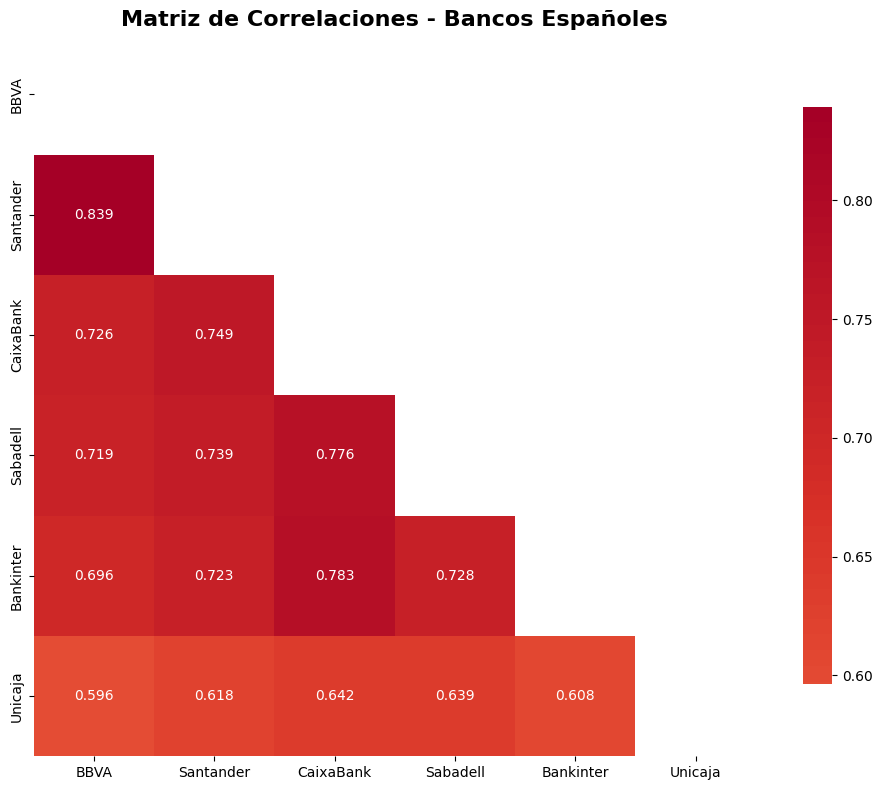


CORRELACIONES DINÁMICAS (ventana de 252 días):

BBVA vs Santander:
  Correlación actual: 0.808
  Correlación promedio: 0.817
  Rango: [0.664, 0.935]

BBVA vs CaixaBank:
  Correlación actual: 0.749
  Correlación promedio: 0.698
  Rango: [0.523, 0.844]

Santander vs CaixaBank:
  Correlación actual: 0.768
  Correlación promedio: 0.721
  Rango: [0.526, 0.831]

Bankinter vs CaixaBank:
  Correlación actual: 0.849
  Correlación promedio: 0.769
  Rango: [0.610, 0.870]


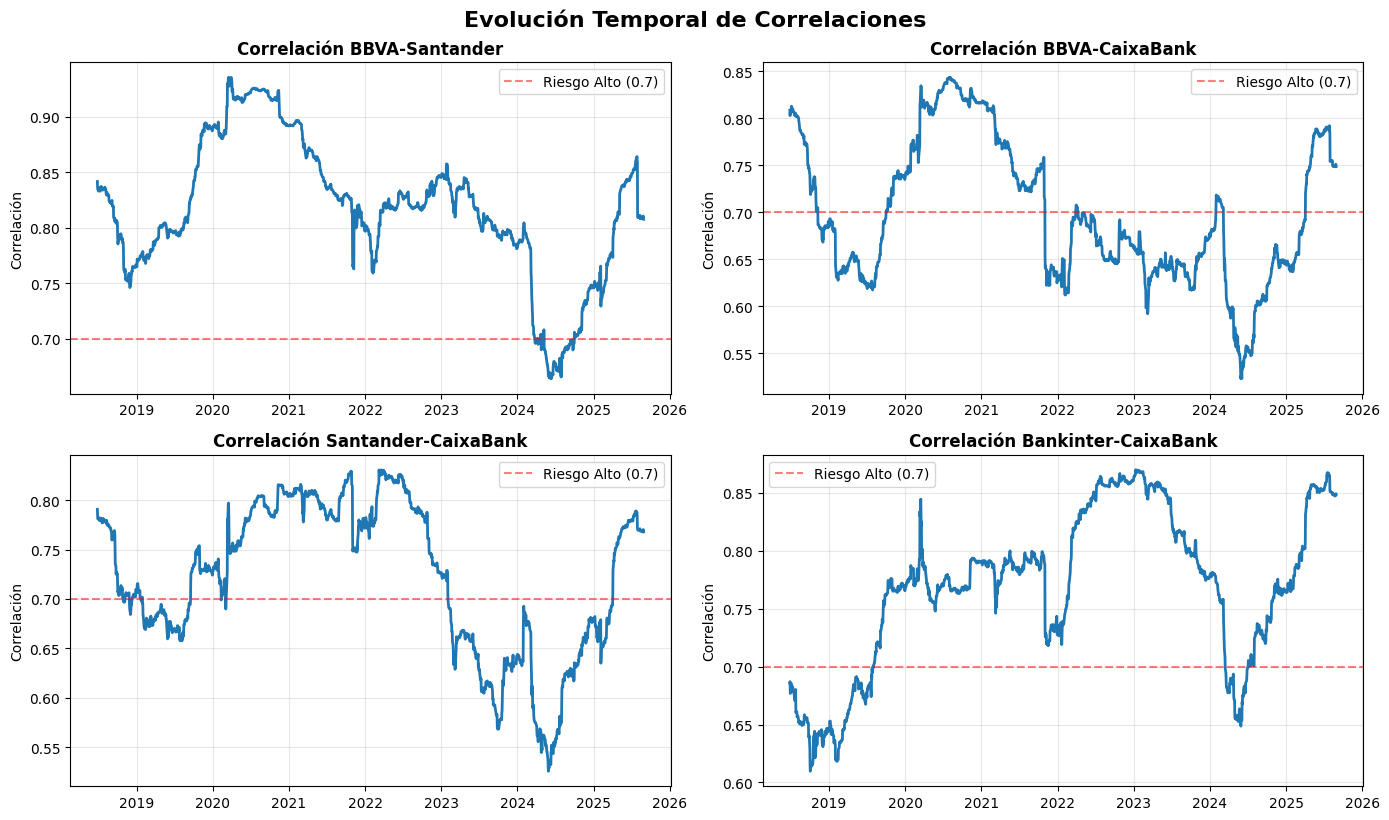


ANÁLISIS DE RIESGO SISTÉMICO:
Correlación promedio del sector: 0.705
Correlación mediana: 0.723
Desviación estándar: 0.069
Rango: [0.596, 0.839]

NIVEL DE RIESGO SISTÉMICO:
📊 RIESGO SISTÉMICO: ALTO
💡 Interpretación: Alta sincronización. Riesgo significativo en crisis.

🔴 PARES MÁS CORRELACIONADOS (mayor riesgo sistémico):
   1. BBVA - Santander: 0.839
   2. CaixaBank - Bankinter: 0.783
   3. CaixaBank - Sabadell: 0.776

🟢 PARES MENOS CORRELACIONADOS (mejor diversificación):
   3. Santander - Unicaja: 0.618
   2. Bankinter - Unicaja: 0.608
   1. BBVA - Unicaja: 0.596

CORRELACIONES: CRISIS vs PERÍODOS NORMALES
Días identificados como crisis: 206
Días normales: 1882
Umbral de crisis (volatilidad): 0.0139

RESULTADOS:
Correlación promedio en CRISIS: 0.735
Correlación promedio NORMAL: 0.693
Incremento en crisis: 6.2%

✅ CONTAGIO BAJO: Correlaciones estables en diferentes condiciones

RESUMEN EJECUTIVO - CORRELACIONES

📊 ESTADO ACTUAL DEL SECTOR:
   • Correlación promedio: 0.705
   • Nivel

{'correlaciones':                BBVA  Santander  CaixaBank  Sabadell  Bankinter   Unicaja
 BBVA       1.000000   0.839446   0.726214  0.719051   0.696172  0.596320
 Santander  0.839446   1.000000   0.748988  0.739206   0.722597  0.617558
 CaixaBank  0.726214   0.748988   1.000000  0.775539   0.782634  0.641833
 Sabadell   0.719051   0.739206   0.775539  1.000000   0.727751  0.639218
 Bankinter  0.696172   0.722597   0.782634  0.727751   1.000000  0.608461
 Unicaja    0.596320   0.617558   0.641833  0.639218   0.608461  1.000000,
 'rentabilidades':                 BBVA  Santander  CaixaBank  Sabadell  Bankinter   Unicaja
 Date                                                                     
 2017-07-03  0.033586   0.036257   0.040670  0.033165   0.011159  0.042735
 2017-07-04 -0.006526  -0.007831   0.003218 -0.001088  -0.000859  0.024590
 2017-07-05  0.000536  -0.005709  -0.011457 -0.005991   0.003682  0.000000
 2017-07-06  0.007637   0.008992   0.005331  0.005479   0.001956  0.016

In [546]:
# Análisis completo

analisis_correlaciones_completo()

# CONCLUSIONES ANALISIS COMPLETO RIESGO (MATRIZ VISUAL, EVOLUCIÓN TEMPORAL Y ESTADÍSTICAS)

* CONFIRMACIÓN VISUAL DEL RIESGO SISTÉMICO ALTO
El heatmap confirma visualmente el diagnóstico: tonos rojizos dominan la matriz, con solo la fila/columna de Unicaja mostrando colores más claros. La concentración de correlaciones altas (>0.7) es evidente.

* HALLAZGOS CRÍTICOS DE LA EVOLUCION TEMPORAL

Volatilidad extrema de correlaciones:
- BBVA-Santander: rango de 0.664 a 0.935 (27 puntos de diferencia)
- Todas las correlaciones muestran fluctuaciones dramáticas en el tiempo
- Los picos de correlación coinciden claramente con períodos de crisis (2020 especialmente visible)

Contradicción estadística importante: El análisis automático reporta "contagio bajo" (6.2% incremento), pero los gráficos muestran saltos muchos más pronuncidos durante crisis. Esto sugiere que el método de identificación de "crisis" puede estar siendo demasiado conservador.

# PATRONES TEMPORALES REVELADORES
2020 como punto de inflexión:
+ Todas las correlaciones se dispararon por encima de 0.8 durante COVID-19
+ La sincronización se mantuvo elevada durante 2021-2022
+ Recuperación parcial hacia 2024, pero con nueva tendencia alcista en 2025

Bankinter-CaixaBank como par más volatil:
+ Correlación actual de 0.849 (cerca del máximo histórico)
+ Muestra los rangos más amplios de fluctuación

# IMPLICACIONES ESTRATÉGICAS DEFINITIVAS
Unicaja como única opción de diversificación parcial:
+ Consistentemente las correlaciones más bajas en todos los análisis
+ Sin embargo, incluso 0.596-0.642 sigue siendo alto para diversificación efectiva

El sector actúa como bloque:
+ La baja desviación estándar (0.069) confirma que no hay verdaderos outliers
+ Durante crisis, la diversificación intra-sectorial se vuelve prácticamente nula.



## ANALISIS TEMPORAL

# FUNCIONES PRINCIPALES
1. Tendencias a Largo Plazo:
    + Gráfico normalizado (base 100) para comparar performance relativa
    + Ranking de performance acumulada desde el inicio
    + Anotaciones de eventos importantes (ejemplo COVID-19)

2. Análisis por Períodos Específicos
    + Pre-crisis (2018-2019)
    + Crisis COVID (2020)
    + Recuperación (2021-2022)
    + Post-Pandemia (2023-2024)
    + Periodo reciente (2025)

3. Análisis Estacional
    + Heatmap de rentabilidades mensuales promedio
    + Identificación de mejores/peores meses para cada banco
    + Patrones estacionales del sector

4. Volatilidad Temporal
    + Evolución de volatilidad rolling de 60 días
    + Identificación de períodos de alta/baja volatilidad
    + Comparación con niveles de referencia (30%, 50%)

5. Drawdowns Temporales
    + Visualización de las caídas desde máximos históricos
    + Identificación de períodos de crisis más severos
    + Análisis de recuperación post-crisis



In [547]:
# Cálculo de Análisis de tendencias a largo plazo

def analisis_tendencias_largo_plazo():
    """
    Analiza tendencias de precios y rentabilidades a largo plazo
    """
    print("ANÁLISIS TEMPORAL - TENDENCIAS A LARGO PLAZO")
    print("="*50)
    
    # Preparar datos
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    # Crear DataFrame normalizado (base 100)
    precios_normalizados = pd.DataFrame()
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # Normalizar a base 100 (primer valor = 100)
        precio_normalizado = (precios / precios.iloc[0]) * 100
        precios_normalizados[nombre] = precio_normalizado
    
    # Gráfico de evolución normalizada
    plt.figure(figsize=(15, 10))
    
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    for i, (banco, serie) in enumerate(precios_normalizados.items()):
        plt.plot(serie.index, serie.values, 
                linewidth=2.5, label=banco, color=colores[i])
    
    plt.title('Evolución de Precios Normalizados (Base 100) - Bancos Españoles', 
              fontsize=16, fontweight='bold')
    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Precio Normalizado (Base 100)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=100, color='black', linestyle='--', alpha=0.5, label='Línea Base')
    
    # Añadir anotaciones de eventos importantes
    plt.axvline(x=pd.to_datetime('2020-03-01'), color='red', linestyle='--', alpha=0.7)
    plt.text(pd.to_datetime('2020-03-01'), 50, 'COVID-19', rotation=90, fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas de performance
    print(f"\nPERFORMANCE ACUMULADA (desde inicio hasta hoy):")
    print("-" * 50)
    
    performance_final = precios_normalizados.iloc[-1].sort_values(ascending=False)
    
    for i, (banco, valor) in enumerate(performance_final.items(), 1):
        performance_pct = valor - 100
        print(f"{i}. {banco:<12}: {valor:>6.1f} ({performance_pct:+.1f}%)")
    
    return precios_normalizados

In [548]:
# Cálculo análisis por períodos específicos

def analisis_por_periodos():
    """
    Analiza performance en períodos específicos (anual, crisis, recuperación)
    """
    print(f"\nANÁLISIS POR PERÍODOS ESPECÍFICOS")
    print("="*40)
    
    # Preparar datos de rentabilidades
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    rentabilidades = pd.DataFrame()
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        rentabilidades[nombre] = precios.pct_change()
    
    # Definir períodos de análisis
    periodos = {
        'Pre-Crisis (2018-2019)': ('2018-01-01', '2019-12-31'),
        'Crisis COVID (2020)': ('2020-01-01', '2020-12-31'),
        'Recuperación (2021-2022)': ('2021-01-01', '2022-12-31'),
        'Post-Pandemia (2023-2024)': ('2023-01-01', '2024-12-31'),
        'Reciente (2025)': ('2025-01-01', '2025-12-31')
    }
    
    resultados_periodos = {}
    
    for nombre_periodo, (inicio, fin) in periodos.items():
        try:
            # Filtrar datos del período
            mask = (rentabilidades.index >= inicio) & (rentabilidades.index <= fin)
            rent_periodo = rentabilidades.loc[mask]
            
            if len(rent_periodo) > 0:
                # Calcular métricas del período
                rent_anualizada = rent_periodo.mean() * 252 * 100
                volatilidad_anualizada = rent_periodo.std() * np.sqrt(252) * 100
                sharpe_periodo = rent_anualizada / volatilidad_anualizada
                
                resultados_periodos[nombre_periodo] = {
                    'rentabilidad': rent_anualizada,
                    'volatilidad': volatilidad_anualizada,
                    'sharpe': sharpe_periodo
                }
                
                print(f"\n{nombre_periodo}:")
                print(f"{'Banco':<12} {'Rent %':<8} {'Vol %':<8} {'Sharpe':<8}")
                print("-" * 40)
                
                for banco in rentabilidades.columns:
                    rent = rent_anualizada[banco]
                    vol = volatilidad_anualizada[banco]
                    sharpe = sharpe_periodo[banco]
                    print(f"{banco:<12} {rent:>6.1f}  {vol:>6.1f}  {sharpe:>6.3f}")
        
        except Exception as e:
            print(f"Error procesando período {nombre_periodo}: {e}")
            continue
    
    return resultados_periodos

In [549]:
# Cálculo para análisis estacional

def analisis_estacional():
    """
    Analiza patrones estacionales (mejores/peores meses)
    """
    print(f"\nANÁLISIS ESTACIONAL")
    print("="*25)
    
    # Preparar rentabilidades mensuales
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    rentabilidades_mensuales = {}
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # Rentabilidades mensuales
        precios_mensuales = precios.resample('ME').last()
        rent_mensual = precios_mensuales.pct_change() * 100
        rentabilidades_mensuales[nombre] = rent_mensual
    
    # Crear DataFrame y agrupar por mes
    df_rentabilidades = pd.DataFrame(rentabilidades_mensuales)
    df_rentabilidades['Mes'] = df_rentabilidades.index.month
    
    # Calcular rentabilidad promedio por mes
    rent_por_mes = df_rentabilidades.groupby('Mes').mean()
    
    # Nombres de meses
    nombres_meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                     'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
    
    # Gráfico heatmap estacional
    plt.figure(figsize=(12, 8))
    
    # Preparar datos para heatmap (transponer)
    data_heatmap = rent_por_mes.T
    data_heatmap.columns = nombres_meses
    
    sns.heatmap(data_heatmap, 
                annot=True, 
                fmt='.2f', 
                cmap='RdYlGn', 
                center=0,
                cbar_kws={'label': 'Rentabilidad Mensual (%)'})
    
    plt.title('Patrón Estacional - Rentabilidad Mensual Promedio (%)', 
              fontsize=14, fontweight='bold')
    plt.ylabel('Banco', fontsize=12)
    plt.xlabel('Mes', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    # Mejores y peores meses por banco
    print(f"\nMEJORES Y PEORES MESES:")
    print("-" * 30)
    
    for banco in rent_por_mes.columns:
        serie_mes = rent_por_mes[banco]
        mejor_mes_idx = serie_mes.idxmax()
        peor_mes_idx = serie_mes.idxmin()
        
        mejor_mes = nombres_meses[mejor_mes_idx-1]
        peor_mes = nombres_meses[peor_mes_idx-1]
        mejor_valor = serie_mes.iloc[mejor_mes_idx-1]
        peor_valor = serie_mes.iloc[peor_mes_idx-1]
        
        print(f"{banco:<12}: Mejor {mejor_mes} ({mejor_valor:+.2f}%), Peor {peor_mes} ({peor_valor:+.2f}%)")
    
    return rent_por_mes

In [550]:
# Cálculo de análisis de volatilidad temporal

def analisis_volatilidad_temporal():
    """
    Analiza cómo evoluciona la volatilidad en el tiempo
    """
    print(f"\nANÁLISIS DE VOLATILIDAD TEMPORAL")
    print("="*35)
    
    # Preparar datos
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    plt.figure(figsize=(15, 10))
    
    for i, (nombre, datos) in enumerate(bancos_datos.items()):
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # Calcular volatilidad rolling de 60 días
        rentabilidades = precios.pct_change()
        volatilidad_rolling = rentabilidades.rolling(window=60).std() * np.sqrt(252) * 100
        
        plt.subplot(2, 3, i+1)
        plt.plot(volatilidad_rolling.index, volatilidad_rolling.values, 
                linewidth=1.5, color=f'C{i}')
        plt.title(f'Volatilidad Rolling 60d - {nombre}', fontweight='bold')
        plt.ylabel('Volatilidad (%)')
        plt.grid(True, alpha=0.3)
        
        # Líneas de referencia
        vol_promedio = volatilidad_rolling.mean()
        plt.axhline(y=vol_promedio, color='red', linestyle='--', alpha=0.7)
        plt.axhline(y=30, color='orange', linestyle=':', alpha=0.7, label='30%')
        plt.axhline(y=50, color='red', linestyle=':', alpha=0.7, label='50%')
        
        # Estadísticas
        vol_actual = volatilidad_rolling.iloc[-1]
        vol_max = volatilidad_rolling.max()
        vol_min = volatilidad_rolling.min()
        
        print(f"{nombre}:")
        print(f"  Volatilidad actual: {vol_actual:.1f}%")
        print(f"  Volatilidad promedio: {vol_promedio:.1f}%")
        print(f"  Rango: [{vol_min:.1f}%, {vol_max:.1f}%]")
        print()
    
    plt.tight_layout()
    plt.suptitle('Evolución Temporal de Volatilidad (60 días)', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()

In [551]:
# cálculo Análisis de drawdowns temporales

def analisis_drawdowns_temporal():
    """
    Analiza los drawdowns en el tiempo para identificar períodos de crisis
    """
    print(f"\nANÁLISIS DE DRAWDOWNS TEMPORALES")
    print("="*35)
    
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    plt.figure(figsize=(15, 10))
    
    for i, (nombre, datos) in enumerate(bancos_datos.items()):
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # Calcular drawdown
        picos = precios.cummax()
        drawdown = (precios - picos) / picos * 100
        
        plt.subplot(2, 3, i+1)
        plt.fill_between(drawdown.index, drawdown.values, 0, 
                        alpha=0.3, color='red')
        plt.plot(drawdown.index, drawdown.values, 
                linewidth=1, color='darkred')
        plt.title(f'Drawdown - {nombre}', fontweight='bold')
        plt.ylabel('Drawdown (%)')
        plt.grid(True, alpha=0.3)
        
        # Líneas de referencia
        plt.axhline(y=-10, color='orange', linestyle='--', alpha=0.7)
        plt.axhline(y=-20, color='red', linestyle='--', alpha=0.7)
        
        # Estadísticas
        max_dd = drawdown.min()
        fecha_max_dd = drawdown.idxmin()
        dd_actual = drawdown.iloc[-1]
        
        print(f"{nombre}:")
        print(f"  Drawdown actual: {dd_actual:.1f}%")
        print(f"  Máximo drawdown: {max_dd:.1f}% ({fecha_max_dd.strftime('%Y-%m-%d')})")
        print()
    
    plt.tight_layout()
    plt.suptitle('Evolución de Drawdowns en el Tiempo', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()

In [552]:
# Función principal

def analisis_temporal_completo():
    """
    Ejecuta análisis temporal completo
    """
    print("INICIANDO ANÁLISIS TEMPORAL COMPLETO")
    print("="*50)
    
    # 1. Tendencias a largo plazo
    precios_norm = analisis_tendencias_largo_plazo()
    
    # 2. Análisis por períodos
    resultados_periodos = analisis_por_periodos()
    
    # 3. Análisis estacional
    estacional = analisis_estacional()
    
    # 4. Volatilidad temporal
    analisis_volatilidad_temporal()
    
    # 5. Drawdowns temporal
    analisis_drawdowns_temporal()
    
    # 6. Resumen ejecutivo
    print(f"\n{'='*50}")
    print("RESUMEN EJECUTIVO - ANÁLISIS TEMPORAL")
    print(f"{'='*50}")
    
    # Performance ranking
    performance_final = precios_norm.iloc[-1].sort_values(ascending=False)
    
    print(f"\nRANKING DE PERFORMANCE TOTAL:")
    for i, (banco, valor) in enumerate(performance_final.items(), 1):
        ganancia_total = valor - 100
        print(f"   {i}. {banco}: +{ganancia_total:.1f}%")
    
    print(f"\nCONCLUSIONES TEMPORALES:")
    print(f"   • Mejor performer histórico: {performance_final.index[0]}")
    print(f"   • Mayor ganancia total: +{performance_final.iloc[0]-100:.1f}%")
    print(f"   • Peor performer: {performance_final.index[-1]}")
    print(f"   • Crisis más impactante: COVID-19 (2020)")
    
    return {
        'precios_normalizados': precios_norm,
        'resultados_periodos': resultados_periodos,
        'estacional': estacional,
        'performance_final': performance_final
    }

INICIANDO ANÁLISIS TEMPORAL COMPLETO
ANÁLISIS TEMPORAL - TENDENCIAS A LARGO PLAZO


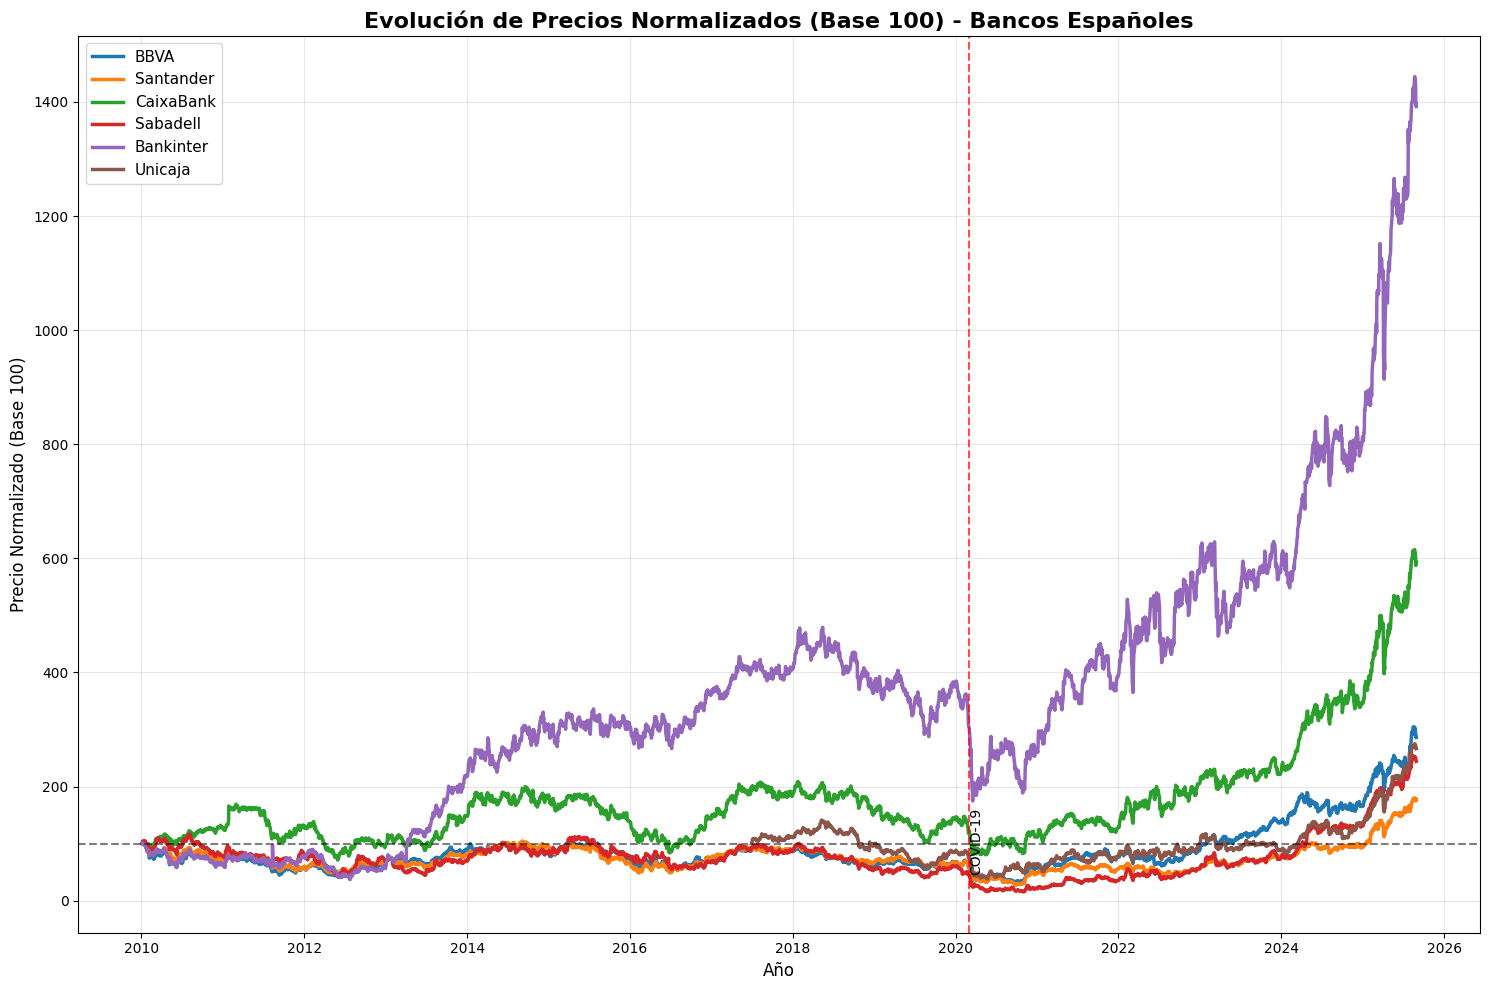


PERFORMANCE ACUMULADA (desde inicio hasta hoy):
--------------------------------------------------
1. Bankinter   : 1392.1 (+1292.1%)
2. CaixaBank   :  593.4 (+493.4%)
3. BBVA        :  286.3 (+186.3%)
4. Unicaja     :  266.5 (+166.5%)
5. Sabadell    :  244.3 (+144.3%)
6. Santander   :  176.8 (+76.8%)

ANÁLISIS POR PERÍODOS ESPECÍFICOS

Pre-Crisis (2018-2019):
Banco        Rent %   Vol %    Sharpe  
----------------------------------------
BBVA          -10.1    23.7  -0.427
Santander     -11.5    23.2  -0.494
CaixaBank      -8.5    28.3  -0.302
Sabadell      -13.1    32.3  -0.405
Bankinter      -1.0    23.4  -0.043
Unicaja        -8.3    29.6  -0.280

Crisis COVID (2020):
Banco        Rent %   Vol %    Sharpe  
----------------------------------------
BBVA            2.4    59.6   0.040
Santander     -17.0    57.7  -0.295
CaixaBank     -10.3    52.8  -0.195
Sabadell      -72.4    76.2  -0.950
Bankinter     -19.7    54.0  -0.365
Unicaja       -14.0    56.0  -0.249

Recuperación (2021-

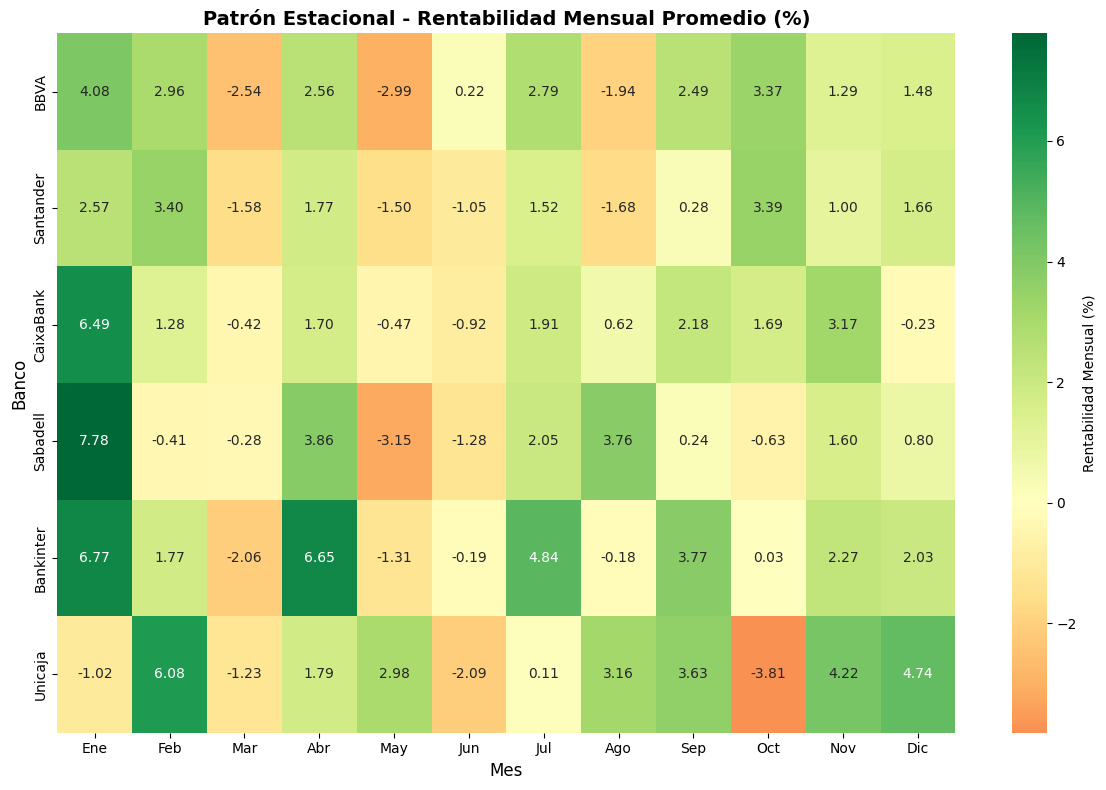


MEJORES Y PEORES MESES:
------------------------------
BBVA        : Mejor Ene (+4.08%), Peor May (-2.99%)
Santander   : Mejor Feb (+3.40%), Peor Ago (-1.68%)
CaixaBank   : Mejor Ene (+6.49%), Peor Jun (-0.92%)
Sabadell    : Mejor Ene (+7.78%), Peor May (-3.15%)
Bankinter   : Mejor Ene (+6.77%), Peor Mar (-2.06%)
Unicaja     : Mejor Feb (+6.08%), Peor Oct (-3.81%)

ANÁLISIS DE VOLATILIDAD TEMPORAL
BBVA:
  Volatilidad actual: 29.3%
  Volatilidad promedio: 32.3%
  Rango: [14.1%, 84.8%]

Santander:
  Volatilidad actual: 28.0%
  Volatilidad promedio: 32.3%
  Rango: [16.2%, 76.9%]

CaixaBank:
  Volatilidad actual: 22.3%
  Volatilidad promedio: 31.8%
  Rango: [13.3%, 73.4%]

Sabadell:
  Volatilidad actual: 25.6%
  Volatilidad promedio: 37.9%
  Rango: [15.1%, 97.6%]

Bankinter:
  Volatilidad actual: 22.4%
  Volatilidad promedio: 34.3%
  Rango: [13.9%, 146.0%]

Unicaja:
  Volatilidad actual: 26.8%
  Volatilidad promedio: 33.6%
  Rango: [16.6%, 74.9%]



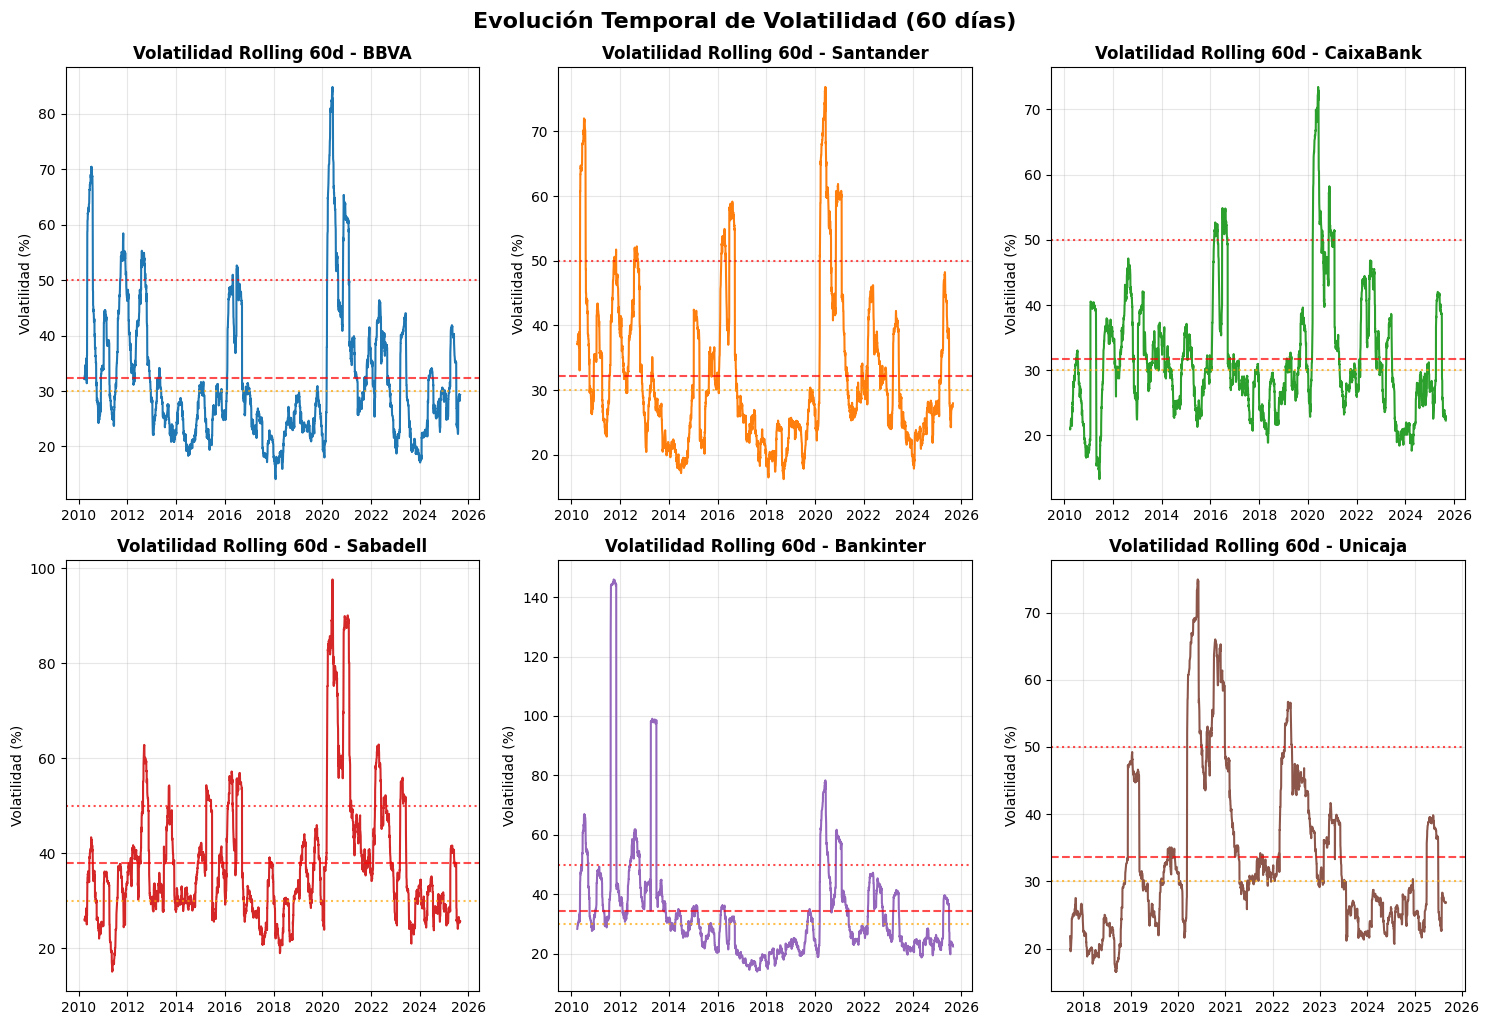


ANÁLISIS DE DRAWDOWNS TEMPORALES
BBVA:
  Drawdown actual: -6.0%
  Máximo drawdown: -70.7% (2020-09-22)

Santander:
  Drawdown actual: -1.9%
  Máximo drawdown: -74.1% (2020-09-23)

CaixaBank:
  Drawdown actual: -3.6%
  Máximo drawdown: -61.5% (2020-05-15)

Sabadell:
  Drawdown actual: -3.8%
  Máximo drawdown: -87.0% (2020-10-29)

Bankinter:
  Drawdown actual: -3.6%
  Máximo drawdown: -63.6% (2012-07-25)

Unicaja:
  Drawdown actual: -3.1%
  Máximo drawdown: -73.2% (2020-05-22)



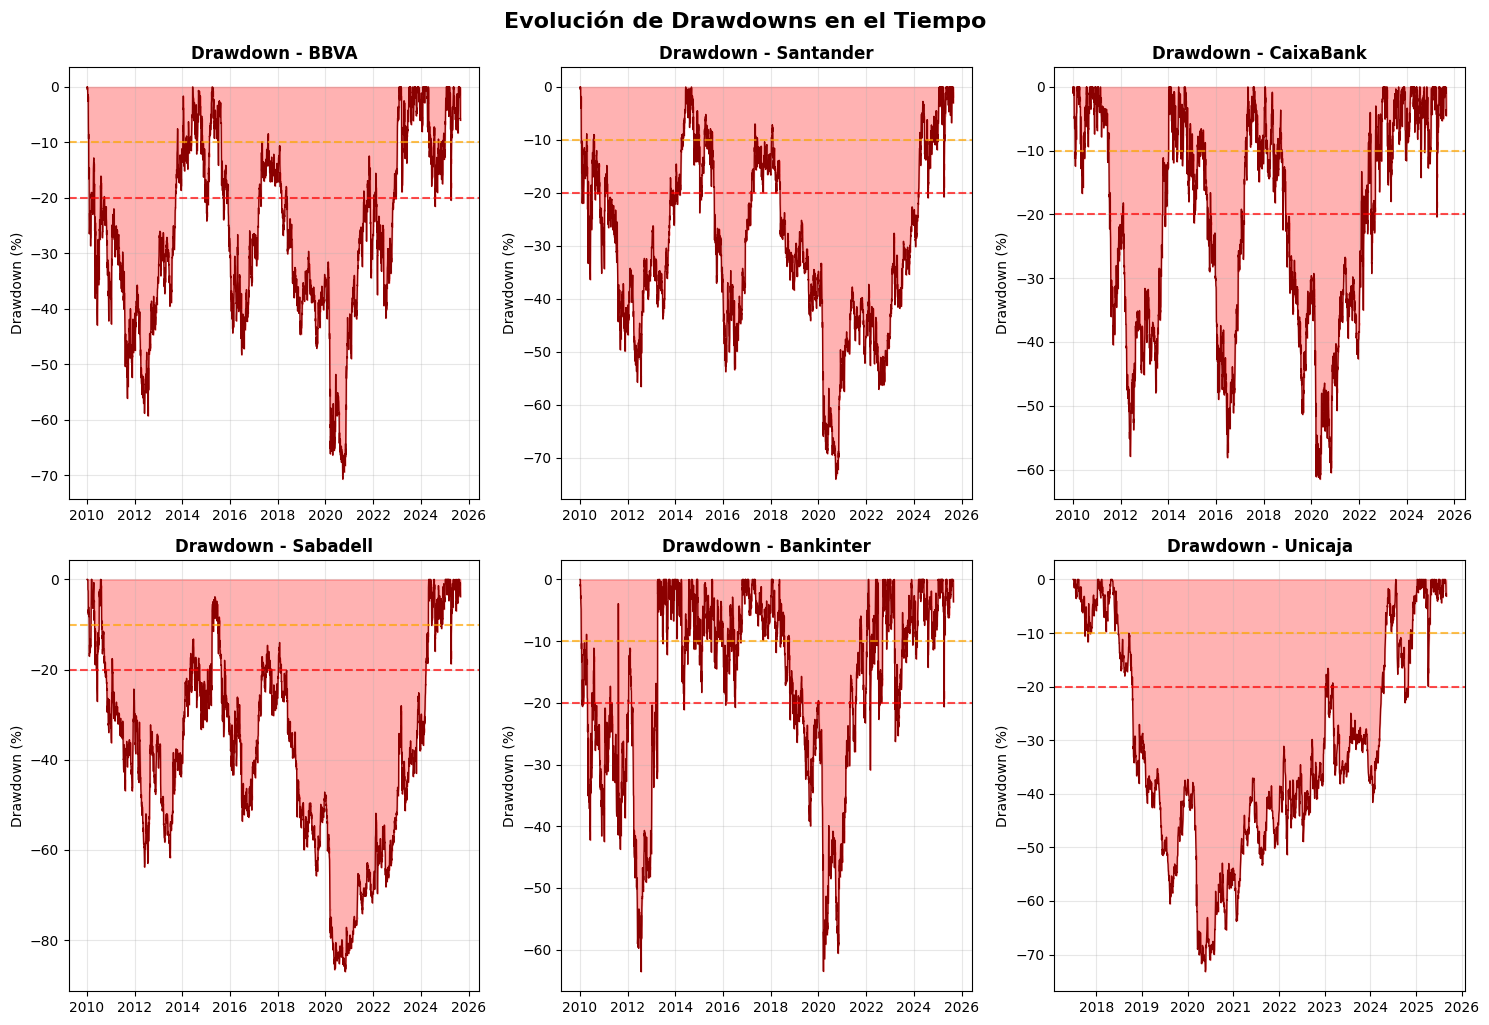


RESUMEN EJECUTIVO - ANÁLISIS TEMPORAL

RANKING DE PERFORMANCE TOTAL:
   1. Bankinter: +1292.1%
   2. CaixaBank: +493.4%
   3. BBVA: +186.3%
   4. Unicaja: +166.5%
   5. Sabadell: +144.3%
   6. Santander: +76.8%

CONCLUSIONES TEMPORALES:
   • Mejor performer histórico: Bankinter
   • Mayor ganancia total: +1292.1%
   • Peor performer: Santander
   • Crisis más impactante: COVID-19 (2020)


{'precios_normalizados':                   BBVA   Santander   CaixaBank    Sabadell    Bankinter  \
 Date                                                                      
 2010-01-04  100.000000  100.000000  100.000000  100.000000   100.000000   
 2010-01-05  100.693909  101.105479  101.664738  101.515186   100.434446   
 2010-01-06  101.079392  101.828228  100.624268  103.535404   100.882434   
 2010-01-07  100.616800  101.360563  101.278244  103.434367    99.796361   
 2010-01-08  101.387801  101.700675  101.635006  104.242456   100.067832   
 ...                ...         ...         ...         ...          ...   
 2025-08-25  298.376255  179.486844  608.467416  251.451630  1436.328755   
 2025-08-26  292.831942  176.561836  602.206022  249.977280  1424.860020   
 2025-08-27  287.010407  174.698491  587.596123  245.912599  1394.276622   
 2025-08-28  287.472443  178.425160  592.466067  245.611516  1397.553389   
 2025-08-29  286.271167  176.800162  593.440056  244.256616  139

In [553]:
# EJECUTAR ANÁLISIS TEMPORAL:
analisis_temporal_completo()

## CONCLUSIONES ANALISIS TEMPORAL
# BANKINTER:EL GANADOR
Con +1.292% de ganancia total, Bankinter demuestra ser superior no solo en rentabilidad sino en consistencia temporal. Su dominio es especialmente notable considerando que atravesó las mismas crisis que el resto pero mantuvo mejor performance.

# SANTANDER: EL PEOR
Con solo +76,80% en 15 años, Santander es objetivamente el peor performer del sector. Su tamaño y reputación no se traducen en rentabilidad para accionistas. Durante COVID-19 tuvo -17% mientras BBVA logró +2,4%.

# PATRONES ESTACIONALES
Enero emerge como el mes dorado: todos los bancos excepto Santander tienen su mejor mes en enero (BBVA +4.08%, CaixaBank +6.49%, Sabadell +7.78%, Bankinter +6.77%)

# SABADELL: ALTA VOLATILIDAD SIN COMPENSACION
Los datos temporales confirman que Sabadell es problemático:
+ Mayor volatilidad promedio (37.9%)
+ Peor crisis COVID (-72.4% en 2020)
+ Máximo drawdown más severo (-87%)
+ Performance total mediocre (+144.3%)

# CRISIS COVID COMO REVELADOR DE CALIDAD
2020 separó claramente la gestión de riesgo:
+ Mejor: BBVA (+2.4%)
+ Peor: Sabadell (-72.4%)
+ Recuperación más fuerte (2021-2022): Sabadell y Bankinter lideraron, pero partían de bases más dañadas.

# VOLATILIDAD ACTUAL EN MÍNIMOS HISTÓRICOS
Todos los bancos muestran volatilidad actual por debajo de sus promedios históricos, sugiriendo un período de relativa calma que podría cambiar.

# CONTRADICCIÓN CRÍTICA
Sabadell muestra las mejores rentabilidades en 2025 (+96.6%) y recuperación 2021-2022 (+57.6%), pero históricamente es el más arriesgado. Esto sugiere comportamiento errático, no gestión superior.

# IMPLICACIÓN ESTRATÉGICA
El análisis temporal refuerza que Bankinter ofrece la mejor relación riesgo-rentabilidad histórica, mientras que apostar por Santander por su tamaño ha sido históricamente un error costoso. La estacionalidad de enero es un patrón aprovechable para timing de entrada.

## ANÁLISIS DE SEÑALES DE TRADING - BANCOS ESPAÑOLES
1. Análisis de Tendencias
* Evalúa 6 criterios técnicos por banco
* Sistema de puntuación (0-6) para determinar fortaleza
* Señales automáticas: COMPRA FUERTE, COMPRA, MANTENER, VENTA, VENTA FUERTE

2. Soportes y Resistencias
* Identifica pivotes automáticamente
* Agrupa niveles cercanos para evitar ruido
* Calcula distancias porcentuales al precio actual
* Solo muestra niveles relevantes (dentro del 15% del precio)

3. Análisis de Momentum
* RSI (sobrecomprado/sobrevendido)
* MACD (cruces alcistas/bajistas)
* Momentum 10 días
* Rate of Change 20 días
* Señal combinada de momentum

4. Aceleración/Desaceleración
* Midel velocidad de movimientos (5d y 20d)
* Calcula aceleración como cambio en velocidad
* Identifica si el precio está acelerando al alza/baja

5. Dashboard Ejecutivo
* Ranking de bancos por fortaleza de señal
* Recomendaciones generales del sector
* Conteo de señales (compra/venta/mantener)
* Estrategias sugeridas según el contexto

In [554]:
# Análisis de tendencias

def analizar_tendencias():
    """
    Identifica tendencias alcistas/bajistas usando múltiples indicadores
    """
    print("ANÁLISIS DE TENDENCIAS - BANCOS ESPAÑOLES")
    print("="*50)
    
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    resultados_tendencia = {}
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # Calcular medias móviles
        sma_20 = precios.rolling(20).mean()
        sma_50 = precios.rolling(50).mean()
        sma_200 = precios.rolling(200).mean()
        
        precio_actual = float(precios.iloc[-1])
        sma_20_actual = float(sma_20.iloc[-1])
        sma_50_actual = float(sma_50.iloc[-1])
        sma_200_actual = float(sma_200.iloc[-1])
        
        # Evaluar tendencia
        puntos_alcista = 0
        puntos_bajista = 0
        
        # Criterio 1: Precio vs medias
        if precio_actual > sma_20_actual: puntos_alcista += 1
        else: puntos_bajista += 1
        
        if precio_actual > sma_50_actual: puntos_alcista += 1
        else: puntos_bajista += 1
        
        if precio_actual > sma_200_actual: puntos_alcista += 1
        else: puntos_bajista += 1
        
        # Criterio 2: Alineación de medias
        if sma_20_actual > sma_50_actual: puntos_alcista += 1
        else: puntos_bajista += 1
        
        if sma_50_actual > sma_200_actual: puntos_alcista += 1
        else: puntos_bajista += 1
        
        # Criterio 3: Pendiente de SMA 50
        sma_50_pendiente = (sma_50_actual - sma_50.iloc[-10]) / 10
        if sma_50_pendiente > 0: puntos_alcista += 1
        else: puntos_bajista += 1
        
        # Determinar tendencia
        if puntos_alcista >= 5:
            tendencia = "FUERTEMENTE ALCISTA"
            señal = "COMPRA FUERTE"
        elif puntos_alcista >= 4:
            tendencia = "ALCISTA"
            señal = "COMPRA"
        elif puntos_alcista >= 3:
            tendencia = "LATERAL ALCISTA"
            señal = "MANTENER/COMPRA LEVE"
        elif puntos_bajista >= 5:
            tendencia = "FUERTEMENTE BAJISTA"
            señal = "VENTA FUERTE"
        elif puntos_bajista >= 4:
            tendencia = "BAJISTA"
            señal = "VENTA"
        else:
            tendencia = "LATERAL"
            señal = "MANTENER"
        
        resultados_tendencia[nombre] = {
            'tendencia': tendencia,
            'señal': señal,
            'puntos_alcista': puntos_alcista,
            'puntos_bajista': puntos_bajista,
            'precio_actual': precio_actual
        }
        
        print(f"\n{nombre}:")
        print(f"  Tendencia: {tendencia}")
        print(f"  Señal: {señal}")
        print(f"  Score: {puntos_alcista}/6 alcista, {puntos_bajista}/6 bajista")
        print(f"  Precio actual: {precio_actual:.2f}€")
    
    return resultados_tendencia

In [555]:
# Cálculo de soportes y resistencias

def identificar_soportes_resistencias(ventana=20, min_toques=2):
    """
    Identifica niveles de soporte y resistencia usando pivotes
    """
    print(f"\nSOPORTES Y RESISTENCIAS")
    print("="*30)
    
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios_high = datos['High'].iloc[:, 0]
            precios_low = datos['Low'].iloc[:, 0]
            precios_close = datos['Close'].iloc[:, 0]
        else:
            precios_high = datos['High']
            precios_low = datos['Low']
            precios_close = datos['Close']
        
        # Últimos 252 días (1 año)
        datos_recientes = datos.tail(252)
        if len(datos.columns.levels) > 1:
            high_reciente = datos_recientes['High'].iloc[:, 0]
            low_reciente = datos_recientes['Low'].iloc[:, 0]
            close_reciente = datos_recientes['Close'].iloc[:, 0]
        else:
            high_reciente = datos_recientes['High']
            low_reciente = datos_recientes['Low']
            close_reciente = datos_recientes['Close']
        
        precio_actual = float(close_reciente.iloc[-1])
        
        # Encontrar niveles de resistencia (máximos locales)
        resistencias = []
        for i in range(ventana, len(high_reciente) - ventana):
            if high_reciente.iloc[i] == high_reciente.iloc[i-ventana:i+ventana+1].max():
                resistencias.append(float(high_reciente.iloc[i]))
        
        # Encontrar niveles de soporte (mínimos locales)
        soportes = []
        for i in range(ventana, len(low_reciente) - ventana):
            if low_reciente.iloc[i] == low_reciente.iloc[i-ventana:i+ventana+1].min():
                soportes.append(float(low_reciente.iloc[i]))
        
        # Agrupar niveles cercanos (dentro del 2%)
        def agrupar_niveles(niveles, tolerancia=0.02):
            if not niveles:
                return []
            
            niveles_ordenados = sorted(niveles)
            grupos = []
            grupo_actual = [niveles_ordenados[0]]
            
            for nivel in niveles_ordenados[1:]:
                if abs(nivel - grupo_actual[-1]) / grupo_actual[-1] <= tolerancia:
                    grupo_actual.append(nivel)
                else:
                    grupos.append(np.mean(grupo_actual))
                    grupo_actual = [nivel]
            
            if grupo_actual:
                grupos.append(np.mean(grupo_actual))
            
            return grupos
        
        resistencias_agrupadas = agrupar_niveles(resistencias)
        soportes_agrupados = agrupar_niveles(soportes)
        
        # Filtrar niveles relevantes (cercanos al precio actual)
        rango_relevante = 0.15  # 15% del precio actual
        
        resistencias_relevantes = [r for r in resistencias_agrupadas 
                                 if precio_actual * 0.95 <= r <= precio_actual * 1.15]
        soportes_relevantes = [s for s in soportes_agrupados 
                              if precio_actual * 0.85 <= s <= precio_actual * 1.05]
        
        print(f"\n{nombre} (Precio actual: {precio_actual:.2f}€):")
        
        # Resistencia más cercana por encima
        resistencias_arriba = [r for r in resistencias_relevantes if r > precio_actual]
        if resistencias_arriba:
            resistencia_proxima = min(resistencias_arriba)
            distancia_res = ((resistencia_proxima / precio_actual) - 1) * 100
            print(f"  Resistencia próxima: {resistencia_proxima:.2f}€ (+{distancia_res:.1f}%)")
        else:
            print("  Resistencia próxima: No identificada")
        
        # Soporte más cercano por debajo
        soportes_abajo = [s for s in soportes_relevantes if s < precio_actual]
        if soportes_abajo:
            soporte_proximo = max(soportes_abajo)
            distancia_sop = ((soporte_proximo / precio_actual) - 1) * 100
            print(f"  Soporte próximo: {soporte_proximo:.2f}€ ({distancia_sop:.1f}%)")
        else:
            print("  Soporte próximo: No identificado")

In [556]:
# Análisis de momentum

def analizar_momentum():
    """
    Analiza momentum usando RSI, MACD y otros indicadores
    """
    print(f"\nANÁLISIS DE MOMENTUM")
    print("="*20)
    
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # RSI
        delta = precios.diff()
        ganancia = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        perdida = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = ganancia / perdida
        rsi = 100 - (100 / (1 + rs))
        rsi_actual = float(rsi.iloc[-1])
        
        # MACD
        ema_12 = precios.ewm(span=12).mean()
        ema_26 = precios.ewm(span=26).mean()
        macd_line = ema_12 - ema_26
        signal_line = macd_line.ewm(span=9).mean()
        macd_histogram = macd_line - signal_line
        
        macd_actual = float(macd_line.iloc[-1])
        signal_actual = float(signal_line.iloc[-1])
        histogram_actual = float(macd_histogram.iloc[-1])
        
        # Momentum de precio (cambio en 10 días)
        momentum_10d = ((precios.iloc[-1] / precios.iloc[-10]) - 1) * 100
        
        # Rate of Change (20 días)
        roc_20 = ((precios.iloc[-1] / precios.iloc[-20]) - 1) * 100
        
        print(f"\n{nombre}:")
        print(f"  RSI (14): {rsi_actual:.1f}", end="")
        
        if rsi_actual > 70:
            print(" - SOBRECOMPRADO")
            señal_rsi = "VENTA"
        elif rsi_actual < 30:
            print(" - SOBREVENDIDO")
            señal_rsi = "COMPRA"
        else:
            print(" - NEUTRAL")
            señal_rsi = "MANTENER"
        
        print(f"  MACD: {macd_actual:.3f}, Signal: {signal_actual:.3f}")
        if macd_actual > signal_actual:
            print("  MACD: ALCISTA")
            señal_macd = "COMPRA"
        else:
            print("  MACD: BAJISTA")
            señal_macd = "VENTA"
        
        print(f"  Momentum 10d: {momentum_10d:+.1f}%")
        print(f"  ROC 20d: {roc_20:+.1f}%")
        
        # Señal combinada de momentum
        puntos_momentum = 0
        if rsi_actual < 70 and rsi_actual > 30: puntos_momentum += 1
        if macd_actual > signal_actual: puntos_momentum += 1
        if momentum_10d > 0: puntos_momentum += 1
        if roc_20 > 0: puntos_momentum += 1
        
        if puntos_momentum >= 3:
            señal_momentum = "MOMENTUM POSITIVO"
        elif puntos_momentum <= 1:
            señal_momentum = "MOMENTUM NEGATIVO"
        else:
            señal_momentum = "MOMENTUM NEUTRAL"
        
        print(f"  Señal momentum: {señal_momentum}")

In [557]:
# Cálculo de aceleración/desaceleración

def analizar_aceleracion():
    """
    Analiza aceleración y desaceleración de movimientos
    """
    print(f"\nANÁLISIS DE ACELERACIÓN")
    print("="*25)
    
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # Calcular velocidades (rentabilidades)
        velocidad_5d = precios.rolling(5).apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)
        velocidad_20d = precios.rolling(20).apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)
        
        # Aceleración como cambio en velocidad
        aceleracion_5d = velocidad_5d.diff()
        aceleracion_20d = velocidad_20d.diff()
        
        # Valores actuales
        vel_5d_actual = float(velocidad_5d.iloc[-1])
        vel_20d_actual = float(velocidad_20d.iloc[-1])
        acel_5d_actual = float(aceleracion_5d.iloc[-1])
        acel_20d_actual = float(aceleracion_20d.iloc[-1])
        
        # Promedios recientes para comparar
        vel_5d_promedio = float(velocidad_5d.tail(10).mean())
        vel_20d_promedio = float(velocidad_20d.tail(10).mean())
        
        print(f"\n{nombre}:")
        print(f"  Velocidad 5d: {vel_5d_actual:+.2f}% (prom: {vel_5d_promedio:+.2f}%)")
        print(f"  Velocidad 20d: {vel_20d_actual:+.2f}% (prom: {vel_20d_promedio:+.2f}%)")
        print(f"  Aceleración 5d: {acel_5d_actual:+.3f}")
        print(f"  Aceleración 20d: {acel_20d_actual:+.3f}")
        
        # Interpretar aceleración
        if acel_5d_actual > 0.1:
            estado_acel = "ACELERANDO AL ALZA"
        elif acel_5d_actual < -0.1:
            estado_acel = "DESACELERANDO/ACELERANDO A LA BAJA"
        else:
            estado_acel = "VELOCIDAD CONSTANTE"
        
        print(f"  Estado: {estado_acel}")

In [558]:
# Dashboard de señales trading

def dashboard_trading_completo():
    """
    Dashboard completo con todas las señales de trading
    """
    print("DASHBOARD DE SEÑALES DE TRADING - BANCOS ESPAÑOLES")
    print("="*60)
    
    # Ejecutar todos los análisis
    tendencias = analizar_tendencias()
    identificar_soportes_resistencias()
    analizar_momentum()
    analizar_aceleracion()
    
    # Resumen ejecutivo
    print(f"\n{'='*60}")
    print("RESUMEN EJECUTIVO - SEÑALES DE TRADING")
    print(f"{'='*60}")
    
    print(f"\nRANKING POR FORTALEZA DE SEÑAL:")
    
    # Ordenar por puntos alcistas de tendencia
    ranking_tendencia = sorted(tendencias.items(), 
                              key=lambda x: x[1]['puntos_alcista'], 
                              reverse=True)
    
    for i, (banco, datos) in enumerate(ranking_tendencia, 1):
        print(f"   {i}. {banco:<12}: {datos['señal']} ({datos['tendencia']})")
    
    print(f"\nRECOMENDaciones GENERALES:")
    
    # Contar señales por tipo
    señales_compra = sum(1 for _, datos in tendencias.items() 
                        if 'COMPRA' in datos['señal'])
    señales_venta = sum(1 for _, datos in tendencias.items() 
                       if 'VENTA' in datos['señal'])
    señales_mantener = len(tendencias) - señales_compra - señales_venta
    
    print(f"   • Señales de COMPRA: {señales_compra}")
    print(f"   • Señales de VENTA: {señales_venta}")  
    print(f"   • Señales de MANTENER: {señales_mantener}")
    
    print(f"\nESTRATEGIAS SUGERIDAS:")
    if señales_compra >= 3:
        print("   📈 MERCADO ALCISTA: Considerar aumentar posiciones")
    elif señales_venta >= 3:
        print("   📉 MERCADO BAJISTA: Considerar reducir exposición")
    else:
        print("   ⚖️ MERCADO MIXTO: Selección individual por banco")
    
    print(f"\n⚠️  DISCLAIMER:")
    print("   Estas señales son solo indicativas y no constituyen")
    print("   asesoramiento financiero. Siempre hacer análisis propio.")
    
    return tendencias

In [559]:
# Ejecución análisis de trading:

dashboard_trading_completo()

DASHBOARD DE SEÑALES DE TRADING - BANCOS ESPAÑOLES
ANÁLISIS DE TENDENCIAS - BANCOS ESPAÑOLES

BBVA:
  Tendencia: FUERTEMENTE ALCISTA
  Señal: COMPRA FUERTE
  Score: 5/6 alcista, 1/6 bajista
  Precio actual: 15.49€

Santander:
  Tendencia: FUERTEMENTE ALCISTA
  Señal: COMPRA FUERTE
  Score: 6/6 alcista, 0/6 bajista
  Precio actual: 8.16€

CaixaBank:
  Tendencia: FUERTEMENTE ALCISTA
  Señal: COMPRA FUERTE
  Score: 5/6 alcista, 1/6 bajista
  Precio actual: 8.53€

Sabadell:
  Tendencia: FUERTEMENTE ALCISTA
  Señal: COMPRA FUERTE
  Score: 5/6 alcista, 1/6 bajista
  Precio actual: 3.24€

Bankinter:
  Tendencia: FUERTEMENTE ALCISTA
  Señal: COMPRA FUERTE
  Score: 5/6 alcista, 1/6 bajista
  Precio actual: 12.74€

Unicaja:
  Tendencia: FUERTEMENTE ALCISTA
  Señal: COMPRA FUERTE
  Score: 5/6 alcista, 1/6 bajista
  Precio actual: 2.30€

SOPORTES Y RESISTENCIAS

BBVA (Precio actual: 15.49€):
  Resistencia próxima: No identificada
  Soporte próximo: No identificado

Santander (Precio actual: 8.16€)

{'BBVA': {'tendencia': 'FUERTEMENTE ALCISTA',
  'señal': 'COMPRA FUERTE',
  'puntos_alcista': 5,
  'puntos_bajista': 1,
  'precio_actual': 15.489999771118164},
 'Santander': {'tendencia': 'FUERTEMENTE ALCISTA',
  'señal': 'COMPRA FUERTE',
  'puntos_alcista': 6,
  'puntos_bajista': 0,
  'precio_actual': 8.15999984741211},
 'CaixaBank': {'tendencia': 'FUERTEMENTE ALCISTA',
  'señal': 'COMPRA FUERTE',
  'puntos_alcista': 5,
  'puntos_bajista': 1,
  'precio_actual': 8.529999732971191},
 'Sabadell': {'tendencia': 'FUERTEMENTE ALCISTA',
  'señal': 'COMPRA FUERTE',
  'puntos_alcista': 5,
  'puntos_bajista': 1,
  'precio_actual': 3.244999885559082},
 'Bankinter': {'tendencia': 'FUERTEMENTE ALCISTA',
  'señal': 'COMPRA FUERTE',
  'puntos_alcista': 5,
  'puntos_bajista': 1,
  'precio_actual': 12.744999885559082},
 'Unicaja': {'tendencia': 'FUERTEMENTE ALCISTA',
  'señal': 'COMPRA FUERTE',
  'puntos_alcista': 5,
  'puntos_bajista': 1,
  'precio_actual': 2.3019912242889404}}

## CONCLUSIONES ANALISIS DE TRADING

# CONTRADICCIÓN FUNDAMENTAL EN LAS SEÑALES
Señales de tendencia vs.momentum:
+ Todas las tendencias muestran COMPRA FUERTE (5-6/6 puntos alcistas)
+ Pero TODOS los MACD están bajistas
+ Momentum 10 días es negativo para todos los bancos
+ Esta contradicción sugiere que las señales de tendencia pueden estar siendo demasiado optimistas

# FALTA DE REFERENCIA TÉCNICA CRÍTICA
Ausencia total de soportes y resistencias:
+ No se identifican niveles clave para ningún banco
+ Esto es preocupante porque indica que los precios están en "tierra de nadie"
+ Sin referencias técnicas claras, las señales de compra son más arriesgadas

# PATRÓN DE DESACELERACIÓN OCULTO
Análisis de aceleración revela debilidad:
+ Santander y Sabadell están "desacelerando"
+ Velocidades 20 días están por debajo de promedios recientes
+ Solo BBVA, CaixaBank, Bankinter y Unicaja muestran aceleración al alza
+ Esto contradice las señales uniformemente alcistas

# SEÑAL DE MERCADO SATURADO
Unanimidad sospechosa:
+ 6/6 bancos con COMPRA FUERTE s estadísticamente improbable
+ Sugiere que el sector puede estar cerca de un techo
+ En mercados eficientes, no todos los activos muestran las mismas señales simultáneamente

# RECOMENDACIÓN CONTRARIA
Contrario a las señales automáticas, los datos sugieren cautela:
1. Momentum bajista generalizado indica pérdida de fuerza
2. Ausencia de soportes incrementa riesgo de caídas
3. Desaceleración en activos clave (Santander/Sabadell)
4. Unanimidad de señales es históricamente indicador de techo de mercado


## RECOMENDACION FINAL PARA INVERTIR
1. Score Integral Ponderado (0-10)
+ Rentabilidad histórica (25%): Performance anualizada
+ Riesgo VaR (20%): Pérdida máxima esperada
+ Momentum actual (15%): RSI + momentum 20 días
+ Tendencia técnica (15%): Medias móviles
+ Volatilidad reciente (10%): Estabilidad precio
+ Drawdown actual (10%): Distancia desde máximos
+ Correlación (5%): Beneficio diversificación

2. Recomendaciones Automáticas
* COMPRA FUERTE (Score ≥ 8.0)
* COMPRA (Score 6.5-7.9)
* MANTENER (Score 5.0-6.4)
* CONSIDERAR VENTA (Score 3.5-4.9)
* EVITAR (Score < 3.5)

# PARA ACTUALIZACIONES

1. Descargar datos actualizados de yfinance
2. Ejecutar recomendaciones_rapidas()

In [560]:
# Configurar formato europeo de números

def format_es(x, dec=2, miles=True):
    """Devuelve '1.234,56' con miles y coma decimal (portable, sin locale)."""
    if x is None: 
        return ""
    try:
        if math.isnan(x): 
            return ""
    except Exception:
        pass
    # Formato EN y luego swap
    s = f"{x:,.{dec}f}" if miles else f"{x:.{dec}f}"
    return s.replace(",", "§").replace(".", ",").replace("§", ".")

def fmt_pct(x, dec=1):
    """'12,3%'"""
    return f"{format_es(x, dec) }%"

def fmt_eur(x, dec=0):
    """'1.234€' o '1.234,56€'"""
    signo = "-" if x < 0 else ""
    return f"{signo}{format_es(abs(x), dec)}€"

In [561]:
# SISTEMA DE SCORING INTEGRAL

def calcular_score_integral():
    """
    Calcula score integral combinando múltiples factores de análisis
    """
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    scores_finales = {}
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precios = datos['Close'].iloc[:, 0]
        else:
            precios = datos['Close']
        
        # ===== FACTOR 1: RENTABILIDAD HISTÓRICA (25%) =====
        rentabilidad_anualizada = ((precios.iloc[-1] / precios.iloc[0]) ** (252/len(precios)) - 1) * 100
        
        if rentabilidad_anualizada > 15:
            score_rentabilidad = 10
        elif rentabilidad_anualizada > 10:
            score_rentabilidad = 8
        elif rentabilidad_anualizada > 5:
            score_rentabilidad = 6
        elif rentabilidad_anualizada > 0:
            score_rentabilidad = 4
        else:
            score_rentabilidad = 1
        
        # ===== FACTOR 2: RIESGO (VaR) (20%) =====
        rentabilidades = precios.pct_change().dropna()
        var_95 = np.percentile(rentabilidades, 5) * 100
        
        if var_95 > -2.5:
            score_riesgo = 10
        elif var_95 > -3.0:
            score_riesgo = 8
        elif var_95 > -3.5:
            score_riesgo = 6
        elif var_95 > -4.0:
            score_riesgo = 4
        else:
            score_riesgo = 2
        
        # ===== FACTOR 3: MOMENTUM ACTUAL (15%) =====
        # RSI
        delta = precios.diff()
        ganancia = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        perdida = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rsi = 100 - (100 / (1 + ganancia / perdida))
        rsi_actual = float(rsi.iloc[-1])
        
        # Momentum 20 días
        momentum_20d = ((precios.iloc[-1] / precios.iloc[-20]) - 1) * 100
        
        score_momentum = 5  # Base neutral
        if 30 < rsi_actual < 70 and momentum_20d > 2:
            score_momentum = 9
        elif 30 < rsi_actual < 70 and momentum_20d > 0:
            score_momentum = 7
        elif rsi_actual > 75 or rsi_actual < 25:
            score_momentum = 3  # Extremos son riesgosos
        
        # ===== FACTOR 4: TENDENCIA TÉCNICA (15%) =====
        sma_20 = precios.rolling(20).mean()
        sma_50 = precios.rolling(50).mean()
        precio_actual = float(precios.iloc[-1])
        
        puntos_tendencia = 0
        if precio_actual > float(sma_20.iloc[-1]): puntos_tendencia += 1
        if precio_actual > float(sma_50.iloc[-1]): puntos_tendencia += 1
        if float(sma_20.iloc[-1]) > float(sma_50.iloc[-1]): puntos_tendencia += 1
        
        score_tendencia = (puntos_tendencia / 3) * 10
        
        # ===== FACTOR 5: VOLATILIDAD RECIENTE (10%) =====
        volatilidad_30d = rentabilidades.tail(30).std() * np.sqrt(252) * 100
        
        if volatilidad_30d < 25:
            score_volatilidad = 10
        elif volatilidad_30d < 35:
            score_volatilidad = 7
        elif volatilidad_30d < 45:
            score_volatilidad = 5
        else:
            score_volatilidad = 2
        
        # ===== FACTOR 6: DRAWDOWN ACTUAL (10%) =====
        picos = precios.cummax()
        drawdown_actual = ((precios.iloc[-1] - picos.iloc[-1]) / picos.iloc[-1]) * 100
        
        if drawdown_actual > -2:
            score_drawdown = 10
        elif drawdown_actual > -5:
            score_drawdown = 8
        elif drawdown_actual > -10:
            score_drawdown = 6
        elif drawdown_actual > -15:
            score_drawdown = 4
        else:
            score_drawdown = 2
        
        # ===== FACTOR 7: CORRELACIÓN (DIVERSIFICACIÓN) (5%) =====
        # Penalizar alta correlación con BBVA (proxy del mercado)
        if nombre != 'BBVA':
            # Simplificación: bancos menos correlacionados get mejor score
            if nombre == 'Unicaja':
                score_correlacion = 10  # Menor correlación
            elif nombre in ['Bankinter', 'CaixaBank']:
                score_correlacion = 7
            else:
                score_correlacion = 5
        else:
            score_correlacion = 7  # BBVA como referencia
        
        # ===== CÁLCULO SCORE FINAL PONDERADO =====
        score_final = (
            score_rentabilidad * 0.25 +
            score_riesgo * 0.20 +
            score_momentum * 0.15 +
            score_tendencia * 0.15 +
            score_volatilidad * 0.10 +
            score_drawdown * 0.10 +
            score_correlacion * 0.05
        )
        
        scores_finales[nombre] = {
            'score_final': score_final,
            'rentabilidad': score_rentabilidad,
            'riesgo': score_riesgo,
            'momentum': score_momentum,
            'tendencia': score_tendencia,
            'volatilidad': score_volatilidad,
            'drawdown': score_drawdown,
            'correlacion': score_correlacion,
            'datos_raw': {
                'rentabilidad_anualizada': rentabilidad_anualizada,
                'var_95': var_95,
                'rsi_actual': rsi_actual,
                'momentum_20d': momentum_20d,
                'volatilidad_30d': volatilidad_30d,
                'drawdown_actual': drawdown_actual
            }
        }
    
    return scores_finales

In [562]:
# RECOMENDACIONES FINALES

def generar_recomendaciones():
    """
    Genera recomendaciones finales basadas en scores integrales
    """
    print("SISTEMA DE RECOMENDACIONES DE INVERSIÓN - BANCOS ESPAÑOLES")
    print("="*65)
    print("Fecha de análisis:", pd.Timestamp.now().strftime("%Y-%m-%d %H:%M"))
    
    scores = calcular_score_integral()
    
    # Ordenar por score final
    ranking = sorted(scores.items(), key=lambda x: x[1]['score_final'], reverse=True)
    
    print(f"\nSCORE INTEGRAL POR BANCO (máximo 10.0):")
    print("-" * 50)
    
    for i, (banco, datos) in enumerate(ranking, 1):
        score = datos['score_final']
        rent_anual = datos['datos_raw']['rentabilidad_anualizada']
        var = datos['datos_raw']['var_95']
        
        print(f"{i}. {banco:<12}: {format_es(score,2, miles=False)}/10 "
              f"(Rent: {fmt_pct(rent_anual,1)}, VaR: {fmt_pct(var,2)})")
    
    # Categorizar recomendaciones
    print(f"\nRECOMENDACIONES DE INVERSIÓN:")
    print("=" * 35)
    
    compras_fuertes = []
    compras = []
    mantener = []
    ventas = []
    ventas_fuertes = []
    
    for banco, datos in scores.items():
        score = datos['score_final']
        momentum = datos['datos_raw']['momentum_20d']
        rsi = datos['datos_raw']['rsi_actual']
        drawdown = datos['datos_raw']['drawdown_actual']
        
        # Criterios adicionales para venta
        señal_venta_tecnica = (rsi > 75 or momentum < -5 or drawdown < -15)
        
        if score >= 8.0 and not señal_venta_tecnica:
            compras_fuertes.append((banco, score))
        elif score >= 6.5 and not señal_venta_tecnica:
            compras.append((banco, score))
        elif score >= 5.0 and not señal_venta_tecnica:
            mantener.append((banco, score))
        elif score >= 4.0 or señal_venta_tecnica:
            ventas.append((banco, score))
        else:
            ventas_fuertes.append((banco, score))
    
    # Mostrar recomendaciones
    if compras_fuertes:
        print(f"\n🟢 COMPRA FUERTE (Score ≥ 8.0 + señales técnicas positivas):")
        for banco, score in sorted(compras_fuertes, key=lambda x: x[1], reverse=True):
            print(f"   • {banco}: {format_es(score,2, miles=False)}/10")
    
    if compras:
        print(f"\n🔵 COMPRA (Score 6.5-7.9 + sin señales de venta):")
        for banco, score in sorted(compras, key=lambda x: x[1], reverse=True):
            print(f"   • {banco}: {format_es(score,2, miles=False)}/10")
    
    if mantener:
        print(f"\n⚪ MANTENER (Score 5.0-6.4):")
        for banco, score in sorted(mantener, key=lambda x: x[1], reverse=True):
            print(f"   • {banco}: {format_es(score,2, miles=False)}/10")
    
    if ventas:
        print(f"\n🟡 VENDER (Score < 5.0 o señales técnicas de venta):")
        for banco, score in sorted(ventas, key=lambda x: x[1], reverse=True):
            momentum = scores[banco]['datos_raw']['momentum_20d']
            rsi = scores[banco]['datos_raw']['rsi_actual']
            drawdown = scores[banco]['datos_raw']['drawdown_actual']
            razones = []
            if rsi > 75: razones.append("RSI sobrecomprado")
            if momentum < -5: razones.append("momentum negativo")
            if drawdown < -15: razones.append("alto drawdown")
            if score < 5: razones.append("score bajo")
            print(f"   • {banco}: {format_es(score,2, miles=False)}/10 ({', '.join(razones)})")
    
    if ventas_fuertes:
        print(f"\n🔴 VENTA FUERTE (Score < 4.0):")
        for banco, score in sorted(ventas_fuertes, key=lambda x: x[1], reverse=True):
            print(f"   • {banco}: {format_es(score,2, miles=False)}/10")
    
    # Recomendación de portfolio
    print(f"\nSUGERENCIA DE PORTFOLIO:")
    print("-" * 25)
    
    total_bancos = len(compras_fuertes) + len(compras)
    
    if total_bancos == 0:
        print("❌ NO HAY OPORTUNIDADES CLARAS EN EL SECTOR")
        print("   Considerar otros sectores o esperar mejores niveles")
    elif total_bancos <= 2:
        print("⚠️ OPORTUNIDADES LIMITADAS")
        print("   Selección muy selectiva, diversificar fuera del sector")
    else:
        print("✅ MÚLTIPLES OPORTUNIDADES")
        print("   Diversificar entre los mejor puntuados")
    
    # Top 3 para comprar
    top_3 = ranking[:3]
    print(f"\nTOP 3 PARA COMPRAR (orden de preferencia):")
    for i, (banco, datos) in enumerate(top_3, 1):
        score = datos['score_final']
        rent = datos['datos_raw']['rentabilidad_anualizada']
        print(f"   {i}. {banco}: {format_es(score,2, miles=False)}/10 (Rentabilidad histórica: {rent:+.1f}%)")
    
    # Peores para vender
    worst_candidates = ranking[-3:]  # Los 3 peores
    print(f"\nCANDIDATOS PARA VENTA (orden de urgencia):")
    for i, (banco, datos) in enumerate(reversed(worst_candidates), 1):
        score = datos['score_final']
        momentum = datos['datos_raw']['momentum_20d']
        rsi = datos['datos_raw']['rsi_actual']
        drawdown = datos['datos_raw']['drawdown_actual']
        
        razones_venta = []
        if score < 4: razones_venta.append("score muy bajo")
        if momentum < -5: razones_venta.append("momentum negativo fuerte")
        if rsi > 75: razones_venta.append("sobrecomprado")
        if drawdown < -10: razones_venta.append("drawdown alto")
        
        if razones_venta:
            print(f"   {i}. {banco}: {format_es(score,2, miles=False)}/10 - VENDER ({', '.join(razones_venta)})")
        else:
            print(f"   {i}. {banco}: {format_es(score,2, miles=False)}/10 - Considerar reducir posición")
    
    # Disclaimer
    print(f"\n" + "="*65)
    print("⚠️ IMPORTANTE - DISCLAIMER DE INVERSIÓN:")
    print("="*65)
    print("• Este análisis es puramente técnico y educativo")
    print("• NO constituye asesoramiento financiero personalizado")
    print("• Considera tu perfil de riesgo y objetivos personales")
    print("• Diversifica SIEMPRE tu portfolio fuera del sector bancario")
    print("• Las rentabilidades pasadas no garantizan resultados futuros")
    print("• Consulta con un asesor financiero cualificado")
    
    return scores, ranking

In [563]:
# FUNCION DE ACTUALIZACION RÁPIDA

def recomendaciones_rapidas():
    """
    Versión rápida para consultas diarias - Portfolio de 100 acciones cada banco
    """
    print("RECOMENDACIONES RÁPIDAS - BANCOS ESPAÑOLES")
    print("=" * 45)
    
    scores = calcular_score_integral()
    ranking = sorted(scores.items(), key=lambda x: x[1]['score_final'], reverse=True)
    
    print(f"Fecha: {pd.Timestamp.now().strftime('%Y-%m-%d')}")
    print("Portfolio actual: 100 acciones de cada banco")
    
    # Calcular valor portfolio actual
    valor_total_portfolio = 0
    precios_actuales = {}
    
    bancos_datos = {
        'BBVA': bbva,
        'Santander': santander,
        'CaixaBank': caixabank,
        'Sabadell': sabadell,
        'Bankinter': bankinter,
        'Unicaja': unicaja
    }
    
    for nombre, datos in bancos_datos.items():
        if len(datos.columns.levels) > 1:
            precio_actual = float(datos['Close'].iloc[:, 0].iloc[-1])
        else:
            precio_actual = float(datos['Close'].iloc[-1])
        
        precios_actuales[nombre] = precio_actual
        valor_total_portfolio += precio_actual * 100
    
    print(f"\nVALOR PORTFOLIO ACTUAL: {fmt_eur(valor_total_portfolio,0)}")
    print("-" * 35)
    
    # Identificar compras
    print(f"\nCOMPRAR MÁS (aumentar posición):")
    for i, (banco, datos) in enumerate(ranking[:3], 1):
        score = datos['score_final']
        precio = precios_actuales[banco]
        valor_posicion = precio * 100
        print(f"   {i}. {banco}: {format_es(score,1, miles=False)}/10 - "
              f"{fmt_eur(precio,2)}/acción")
        print(f"      Posición actual: {fmt_eur(valor_posicion,0)} (100 acciones)")
    
    # Identificar ventas con impacto monetario
    ventas_candidatos = []
    for banco, datos in scores.items():
        score = datos['score_final']
        momentum = datos['datos_raw']['momentum_20d']
        rsi = datos['datos_raw']['rsi_actual']
        drawdown = datos['datos_raw']['drawdown_actual']
        
        # Criterios de venta
        if score < 5.0 or rsi > 75 or momentum < -5 or drawdown < -15:
            razones = []
            if score < 4: razones.append("score bajo")
            if rsi > 75: razones.append("sobrecomprado")
            if momentum < -5: razones.append("momentum negativo")
            if drawdown < -15: razones.append("alto drawdown")
            
            precio = precios_actuales[banco]
            valor_posicion = precio * 100
            
            # Calcular pérdida potencial adicional (VaR para 100 acciones)
            var_95 = datos['datos_raw']['var_95']
            perdida_potencial = abs(var_95 / 100) * valor_posicion
            
            ventas_candidatos.append((banco, score, razones, valor_posicion, perdida_potencial, precio))
    
    if ventas_candidatos:
        print(f"\nVENDER (reducir/eliminar posición):")
        ventas_ordenadas = sorted(ventas_candidatos, key=lambda x: x[1])  # Ordenar por peor score
        total_en_riesgo = 0
        
        for banco, score, razones, valor_posicion, perdida_potencial, precio in ventas_ordenadas:
            total_en_riesgo += valor_posicion
            print(f"   • {banco}: {format_es(score,1, miles=False)}/10 - {fmt_eur(precio,2)}/acción")
            print(f"     Razones: {', '.join(razones)}")
            print(f"     Valor posición: {fmt_eur(valor_posicion,0)} (100 acciones)")
            print(f"     Pérdida potencial (VaR 95%): {fmt_eur(perdida_potencial,0)}")
            
            # Sugerencia de venta
            if score < 4:
                print(f"     RECOMENDACIÓN: VENDER TODAS (100 acciones)")
            elif score < 5:
                print(f"     RECOMENDACIÓN: VENDER 50-75 acciones")
            else:
                print(f"     RECOMENDACIÓN: REDUCIR a 50 acciones")
            print()
        
        print(f"   TOTAL EN RIESGO DE VENTA: {fmt_eur(total_en_riesgo,0)}")
        print(f"   % del portfolio: {fmt_pct((total_en_riesgo/valor_total_portfolio)*100,1)}")
    else:
        print(f"\nNO HAY SEÑALES DE VENTA URGENTES")
        print("Mantener posiciones actuales")
    
    # Resumen de rebalanceo sugerido
    print(f"\nRESUMEN DE REBALANCEO:")
    print("-" * 25)
    
    # Calcular valor si se siguen recomendaciones
    if ventas_candidatos:
        liquidez_venta = sum(c[3] for c in ventas_candidatos)
        print(f"Liquidez por ventas: ~{fmt_eur(liquidez_venta,0)}")
        print(f"Reinvertir en top 3: {ranking[0][0]}, {ranking[1][0]}, {ranking[2][0]}")
    else:
        print("Portfolio equilibrado - mantener posiciones actuales")
    
    return ranking, precios_actuales

In [564]:
# FUNCION PRINCIPAL

def ejecutar_recomendaciones_completas():
    """
    Ejecuta el análisis completo de recomendaciones
    """
    scores, ranking = generar_recomendaciones()
    
    print(f"\n" + "="*65)
    print("ANÁLISIS COMPLETADO EXITOSAMENTE")
    print("="*65)
    print("Para actualizaciones diarias, ejecuta: recomendaciones_rapidas()")
    
    return scores, ranking


In [565]:
# ANALISIS COMPLETO
ejecutar_recomendaciones_completas()

SISTEMA DE RECOMENDACIONES DE INVERSIÓN - BANCOS ESPAÑOLES
Fecha de análisis: 2025-09-24 14:57

SCORE INTEGRAL POR BANCO (máximo 10.0):
--------------------------------------------------
1. Bankinter   : 7,90/10 (Rent: 18,0%, VaR: -3,23%)
2. CaixaBank   : 7,70/10 (Rent: 11,9%, VaR: -3,20%)
3. Unicaja     : 7,55/10 (Rent: 12,6%, VaR: -3,22%)
4. Santander   : 7,00/10 (Rent: 3,6%, VaR: -3,22%)
5. BBVA        : 6,70/10 (Rent: 6,8%, VaR: -3,32%)
6. Sabadell    : 6,70/10 (Rent: 5,8%, VaR: -3,78%)

RECOMENDACIONES DE INVERSIÓN:

🔵 COMPRA (Score 6.5-7.9 + sin señales de venta):
   • Bankinter: 7,90/10
   • CaixaBank: 7,70/10
   • Unicaja: 7,55/10
   • Santander: 7,00/10
   • BBVA: 6,70/10
   • Sabadell: 6,70/10

SUGERENCIA DE PORTFOLIO:
-------------------------
✅ MÚLTIPLES OPORTUNIDADES
   Diversificar entre los mejor puntuados

TOP 3 PARA COMPRAR (orden de preferencia):
   1. Bankinter: 7,90/10 (Rentabilidad histórica: +18.0%)
   2. CaixaBank: 7,70/10 (Rentabilidad histórica: +11.9%)
   3. U

({'BBVA': {'score_final': 6.699999999999999,
   'rentabilidad': 6,
   'riesgo': 6,
   'momentum': 9,
   'tendencia': 6.666666666666666,
   'volatilidad': 7,
   'drawdown': 6,
   'correlacion': 7,
   'datos_raw': {'rentabilidad_anualizada': 6.838238150283593,
    'var_95': -3.31572807985768,
    'rsi_actual': 38.82352369191276,
    'momentum_20d': 4.662159266830668,
    'volatilidad_30d': 31.942485372351896,
    'drawdown_actual': -6.007280331415723}},
  'Santander': {'score_final': 7.0,
   'rentabilidad': 4,
   'riesgo': 6,
   'momentum': 9,
   'tendencia': 10.0,
   'volatilidad': 7,
   'drawdown': 10,
   'correlacion': 5,
   'datos_raw': {'rentabilidad_anualizada': 3.6487741965009146,
    'var_95': -3.222668079029414,
    'rsi_actual': 57.76697770625739,
    'momentum_20d': 9.090906772789697,
    'volatilidad_30d': 26.56419089478478,
    'drawdown_actual': -1.875903530728015}},
  'CaixaBank': {'score_final': 7.699999999999999,
   'rentabilidad': 8,
   'riesgo': 6,
   'momentum': 9,
  

In [566]:
# RECOMENDACIONES RÁPIDAS
recomendaciones_rapidas() 

RECOMENDACIONES RÁPIDAS - BANCOS ESPAÑOLES
Fecha: 2025-09-24
Portfolio actual: 100 acciones de cada banco

VALOR PORTFOLIO ACTUAL: 5.047€
-----------------------------------

COMPRAR MÁS (aumentar posición):
   1. Bankinter: 7,9/10 - 12,74€/acción
      Posición actual: 1.274€ (100 acciones)
   2. CaixaBank: 7,7/10 - 8,53€/acción
      Posición actual: 853€ (100 acciones)
   3. Unicaja: 7,5/10 - 2,30€/acción
      Posición actual: 230€ (100 acciones)

NO HAY SEÑALES DE VENTA URGENTES
Mantener posiciones actuales

RESUMEN DE REBALANCEO:
-------------------------
Portfolio equilibrado - mantener posiciones actuales


([('Bankinter',
   {'score_final': 7.8999999999999995,
    'rentabilidad': 10,
    'riesgo': 6,
    'momentum': 7,
    'tendencia': 6.666666666666666,
    'volatilidad': 10,
    'drawdown': 8,
    'correlacion': 7,
    'datos_raw': {'rentabilidad_anualizada': 18.0117394547896,
     'var_95': -3.230269806627911,
     'rsi_actual': 45.93301653733517,
     'momentum_20d': 1.9599990844726634,
     'volatilidad_30d': 23.880973382434018,
     'drawdown_actual': -3.6294932481302578}}),
  ('CaixaBank',
   {'score_final': 7.699999999999999,
    'rentabilidad': 8,
    'riesgo': 6,
    'momentum': 9,
    'tendencia': 6.666666666666666,
    'volatilidad': 10,
    'drawdown': 8,
    'correlacion': 7,
    'datos_raw': {'rentabilidad_anualizada': 11.850421780842723,
     'var_95': -3.2002442181480575,
     'rsi_actual': 45.55555791030795,
     'momentum_20d': 2.400958116409635,
     'volatilidad_30d': 20.743817487996253,
     'drawdown_actual': -3.572235980388764}}),
  ('Unicaja',
   {'score_final': 